In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
from state_evolution.constants import SEProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [20]:
d = 500

In [26]:
data_models = []
for beta in np.linspace(1.01, 3, 30):
    powerlaw_kwargs = {
        "x_diagonal": KFeaturesDefinition(diagonal=[(10e2 * i**-beta, 1) for i in range(1, d + 1)]),
        "θ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
        "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
        "δ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
        "ν_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    }

    powerlaw_datamodel = DataModel(
        d,
        normalize_matrices=True,
        data_model_factory=k_features_factory,
        factory_kwargs=powerlaw_kwargs,
        name=f"powerlaw-{beta}"
    )

    data_models.append(powerlaw_datamodel)

Define an experiment

In [ ]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=0,
    alphas=[10e5],
    epsilons=np.array([0.0, 0.1, 0.2]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = data_models,
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.Logistic,
    se_problem_type=SEProblemType.Logistic,
    gamma_fair_error=0.01,
    name="powerlaw-beta"
)
experiment_json = experiment.to_json()

In [28]:
with open("powerlaw_beta.json", "w") as f:
    f.write(experiment_json)

In [29]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 4
INFO:root:This process has rank 2
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment powerlaw-beta
INFO:root:Starting Experiment powerlaw-beta
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
  0%|          | 0/90 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:Starting task 1
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Starting task 4
INFO:root:Initializing data model


2025-02-23 19:22:09,976 - Rank 0 - INFO - The MPI comm size is 5
2025-02-23 19:22:09,976 - Rank 0 - INFO - This process has rank 0
2025-02-23 19:22:09,976 - Rank 0 - INFO - Starting Master for experiment powerlaw-beta
2025-02-23 19:22:09,976 - Rank 0 - INFO - Starting Experiment powerlaw-beta
2025-02-23 19:22:09,986 - Rank 0 - INFO - Starting all processes
2025-02-23 19:22:09,986 - Rank 0 - INFO - Sending task 0 to 1
2025-02-23 19:22:09,986 - Rank 0 - INFO - Sending task 1 to 2
2025-02-23 19:22:09,986 - Rank 0 - INFO - Sending task 2 to 3
2025-02-23 19:22:09,986 - Rank 0 - INFO - Sending task 3 to 4
2025-02-23 19:22:09,986 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-02-23 19:22:09,986 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1248.4468861784467
INFO:root:Norm Σ_x: 500.0000000000002
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.07300897e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.84450362e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.04249663e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.63436177e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.61451360e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.59475066e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:22:26,296 - Rank 0 - INFO - Received task 4 from 4
2025-02-23 19:22:26,296 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [430.5157523095, 1], [262.9579855593063, 1], [185.34381298661475, 1], [141.3021872290168, 1], [113.20755497885537, 1], [93.85930813838347, 1], [79.79343108384373, 1], [69.14690216940832, 1], [60.83281743787799, 1], [54.17639903393895, 1], [48.737635698841004, 1], [44.217942535392446, 1], [40.407910654445345, 1], [37.15653850886619, 1], [34.35232901241723, 1], [31.91125090823146, 1], [29.76883060733422, 1], [27.87481546949981, 1], [26.189486164374514, 1], [24.681054594059518, 1], [23.323793187515896, 1], [22.096667258590372, 1], [20.98231989867288, 1], [19.96630811570

INFO:root:Finished State Evolution Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [473.4812859584348, 1], [305.7504769544765, 1], [224.18452815285315, 1], [176.22864089110934, 1], [144.76712901081032, 1], [122.59133352830206, 1], [106.14717868179784, 1], [93.48335415788988, 1], [83.44096351182965, 1], [75.28913433963882, 1], [68.5445264085491, 1], [62.874950057557236, 1], [58.044702246339845, 1], [53.88199100549584, 1], [50.2587026631174, 1], [47.077385507580345, 1], [44.26261874238549, 1], [41.755136623454796, 1], [39.50773470519194, 1], [37.48235869676367, 1], [35.647996145829545, 1], [33.97912431756434, 1], [32.45455050933173, 1], [31.05653387032757, 1], [29.770112207824567, 1], [28.582580121079072, 1], [27.4830802626714

2025-02-23 19:22:26,618 - Rank 0 - INFO - Received task 1 from 1
2025-02-23 19:22:26,632 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [496.546247718518, 1], [329.6913347240569, 1], [246.5581761233398, 1], [196.8068886726915, 1], [163.70699516254035, 1], [140.104143531845, 1], [122.42753719836585, 1], [108.69637619213013, 1], [97.72372209558107, 1], [88.75511437500464, 1], [81.28809417323299, 1], [74.9751277058444, 1], [69.5681867605543, 1], [64.88552580938854, 1], [60.790934213267846, 1], [57.18032104322568, 1], [53.97277773880266, 1], [51.104466990047726, 1], [48.524347519648, 1], [46.191122081384826, 1], [44.07101900873644, 1], [42.13615332107338, 1], [40.36329814590837, 1], [38.73295142902519, 1

INFO:root:Received task 2 from 2
INFO:root:Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [473.4812859584348, 1], [305.7504769544765, 1], [224.18452815285315, 1], [176.22864089110934, 1], [144.76712901081032, 1], [122.59133352830206, 1], [106.14717868179784, 1], [93.48335415788988, 1], [83.44096351182965, 1], [75.28913433963882, 1], [68.5445264085491, 1], [62.874950057557236, 1], [58.044702246339845, 1], [53.88199100549584, 1], [50.2587026631174, 1], [47.077385507580345, 1], [44.26261874238549, 1], [41.755136623454796, 1], [39.50773470519194, 1], [37.48235869676367, 1], [35.647996145829545, 1], [33.97912431756434, 1], [32.45455050933173, 1], [31.05653387032757, 1], [29.770112207824567, 1], [28.582580121079072, 1], [27

2025-02-23 19:22:26,930 - Rank 0 - INFO - Received task 2 from 2
2025-02-23 19:22:26,930 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [473.4812859584348, 1], [305.7504769544765, 1], [224.18452815285315, 1], [176.22864089110934, 1], [144.76712901081032, 1], [122.59133352830206, 1], [106.14717868179784, 1], [93.48335415788988, 1], [83.44096351182965, 1], [75.28913433963882, 1], [68.5445264085491, 1], [62.874950057557236, 1], [58.044702246339845, 1], [53.88199100549584, 1], [50.2587026631174, 1], [47.077385507580345, 1], [44.26261874238549, 1], [41.755136623454796, 1], [39.50773470519194, 1], [37.48235869676367, 1], [35.647996145829545, 1], [33.97912431756434, 1], [32.45455050933173, 1], [31.056533870

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 2929.411867385538
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.42333452e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.84304384e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.47098677e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.88385090e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.87128290e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.85877230e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:22:43,489 - Rank 0 - INFO - Received task 5 from 4
2025-02-23 19:22:43,489 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [410.5179587308421, 1], [243.86303501436748, 1], [168.52499444053743, 1], [126.527544733072, 1], [100.11015534400602, 1], [82.1270339239675, 1], [69.18253671285595, 1], [59.46917984641862, 1], [51.941829387046035, 1], [45.95672276044989, 1], [41.09701662004886, 1], [37.08164312128295, 1], [33.714622323085756, 1], [30.855391071523087, 1], [28.40067375118317, 1], [26.27299451327438, 1], [24.41316631794911, 1], [22.775244451903223, 1], [21.32305377271581, 1], [20.02774774942663, 1], [18.866060017579123, 1], [17.81903056176675, 1], [16.871063372789955, 1], [16.0092195761

INFO:root:Finished State Evolution Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [373.26596231109266, 1], [209.73224008839205, 1], [139.32747862002603, 1], [101.45126651999456, 1], [78.28590642425479, 1], [62.87872365611835, 1], [52.00620538348221, 1], [43.987612532494936, 1], [37.868304625264905, 1], [33.06944318592603, 1], [29.221464196845616, 1], [26.078334267523463, 1], [23.47048729439428, 1], [21.27760138704295, 1], [19.412146298613816, 1], [17.80906290746942, 1], [16.4190785217092, 1], [15.204254798508774, 1], [14.134949167039105, 1], [13.18769556629667, 1], [12.343697533886687, 1], [11.587737974473985, 1], [10.907377953574718, 1], [10.292359478510969, 1], [9.734154535837488, 1], [9.22562051258039, 1], [8.76073402585

2025-02-23 19:22:43,864 - Rank 0 - INFO - Received task 7 from 1
2025-02-23 19:22:43,920 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [373.26596231109266, 1], [209.73224008839205, 1], [139.32747862002603, 1], [101.45126651999456, 1], [78.28590642425479, 1], [62.87872365611835, 1], [52.00620538348221, 1], [43.987612532494936, 1], [37.868304625264905, 1], [33.06944318592603, 1], [29.221464196845616, 1], [26.078334267523463, 1], [23.47048729439428, 1], [21.27760138704295, 1], [19.412146298613816, 1], [17.80906290746942, 1], [16.4190785217092, 1], [15.204254798508774, 1], [14.134949167039105, 1], [13.18769556629667, 1], [12.343697533886687, 1], [11.587737974473985, 1], [10.907377953574718, 1], [10.2923

INFO:root:Received task 6 from 3
INFO:root:Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [391.44907831243285, 1], [226.15468292369553, 1], [153.2323809116532, 1], [113.29774782772787, 1], [88.52804218652112, 1], [71.86127657370002, 1], [59.982674275486275, 1], [51.14594060831727, 1], [44.35029896203852, 1], [38.984140779784425, 1], [34.654220518717864, 1], [31.097065528853822, 1], [28.130030481129694, 1], [25.622816235948616, 1], [23.480162559853976, 1], [21.63093645810329, 1], [20.021031310548228, 1], [18.608616814397028, 1], [17.360883651570827, 1], [16.251764218017115, 1], [15.26030597704874, 1], [14.369490495800362, 1], [13.565362681687906, 1], [12.836379662835418, 1], [12.172917639491157, 1], [11.566893981108155

2025-02-23 19:22:44,070 - Rank 0 - INFO - Received task 6 from 3
2025-02-23 19:22:44,070 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [391.44907831243285, 1], [226.15468292369553, 1], [153.2323809116532, 1], [113.29774782772787, 1], [88.52804218652112, 1], [71.86127657370002, 1], [59.982674275486275, 1], [51.14594060831727, 1], [44.35029896203852, 1], [38.984140779784425, 1], [34.654220518717864, 1], [31.097065528853822, 1], [28.130030481129694, 1], [25.622816235948616, 1], [23.480162559853976, 1], [21.63093645810329, 1], [20.021031310548228, 1], [18.608616814397028, 1], [17.360883651570827, 1], [16.251764218017115, 1], [15.26030597704874, 1], [14.369490495800362, 1], [13.565362681687906, 1], [12.8

INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [355.92746627652696, 1], [194.50232895392355, 1], [126.68436125002822, 1], [90.84346049103074, 1], [69.22872112945358, 1], [55.01897652162628, 1], [45.09044371658278, 1], [37.83115596850029, 1], [32.33368272036435, 1], [28.052127115092883, 1], [24.64040330517068, 1], [21.86957214781784, 1], [19.582764910470164, 1], [17.66926463573922, 1], [16.04892738532765, 1], [14.66245912452804, 1], [13.465147490180419, 1], [12.422705367285914, 1], [11.508445766048407, 1], [10.70131907011755, 1], [9.984522527742069, 1], [9.344497733187534, 1], [8.770196316441158, 1], [8.252534313985464, 1], [7.783981403124508, 1], [7.358247942892433, 1], [6.970043897272525,

2025-02-23 19:22:44,391 - Rank 0 - INFO - Received task 8 from 2
2025-02-23 19:22:44,397 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [355.92746627652696, 1], [194.50232895392355, 1], [126.68436125002822, 1], [90.84346049103074, 1], [69.22872112945358, 1], [55.01897652162628, 1], [45.09044371658278, 1], [37.83115596850029, 1], [32.33368272036435, 1], [28.052127115092883, 1], [24.64040330517068, 1], [21.86957214781784, 1], [19.582764910470164, 1], [17.66926463573922, 1], [16.04892738532765, 1], [14.66245912452804, 1], [13.465147490180419, 1], [12.422705367285914, 1], [11.508445766048407, 1], [10.70131907011755, 1], [9.984522527742069, 1], [9.344497733187534, 1], [8.770196316441158, 1], [8.2525343139

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 16128.767029439365
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.12771183e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.22133389e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.83793155e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32747170e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32332676e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.31920303e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 

2025-02-23 19:23:00,260 - Rank 0 - INFO - Received task 10 from 1
2025-02-23 19:23:00,261 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [323.6292234897429, 1], [167.28000269295555, 1], [104.735874296574, 1], [72.83935005074994, 1], [54.136697376883305, 1], [42.12404679984666, 1], [33.89558967011957, 1], [27.982599300955208, 1], [23.572942296421772, 1], [20.185691410425925, 1], [17.52021733437995, 1], [15.380171015970404, 1], [13.632572556079966, 1], [12.18456667264258, 1], [10.96960336466775, 1], [9.938899686329476, 1], [9.055986882992757, 1], [8.293126253370852, 1], [7.628893010759496, 1], [7.046510662116534, 1], [6.532679636759716, 1], [6.076738622783254, 1], [5.6700543312969165, 1], [5.305570915

INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [308.5963928147888, 1], [155.13280217426737, 1], [95.23173365829948, 1], [65.22322338108569, 1], [47.87342315822914, 1], [36.85860346898339, 1], [29.388169488449932, 1], [24.06618631044037, 1], [20.12765146315624, 1], [17.1231060096076, 1], [14.773565698325488, 1], [12.897977157169258, 1], [11.374432074718937, 1], [10.118261409946015, 1], [9.069083095565286, 1], [8.18283989173117, 1], [7.4267382842105505, 1], [6.77593643257244, 1], [6.211320637363323, 1], [5.717978440373565, 1], [5.284128748350138, 1], [4.900358500585528, 1], [4.559069083515543, 1], [4.254068868219003, 1], [3.980269225309978, 1], [3.733454919986607, 1], [3.5101087085750993, 1

2025-02-23 19:23:00,889 - Rank 0 - INFO - Received task 11 from 3
2025-02-23 19:23:00,889 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [308.5963928147888, 1], [155.13280217426737, 1], [95.23173365829948, 1], [65.22322338108569, 1], [47.87342315822914, 1], [36.85860346898339, 1], [29.388169488449932, 1], [24.06618631044037, 1], [20.12765146315624, 1], [17.1231060096076, 1], [14.773565698325488, 1], [12.897977157169258, 1], [11.374432074718937, 1], [10.118261409946015, 1], [9.069083095565286, 1], [8.18283989173117, 1], [7.4267382842105505, 1], [6.77593643257244, 1], [6.211320637363323, 1], [5.717978440373565, 1], [5.284128748350138, 1], [4.900358500585528, 1], [4.559069083515543, 1], [4.254068868219

INFO:root:Finished State Evolution Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [294.26184888806154, 1], [143.86768246658949, 1], [86.59003571102036, 1], [58.40344354054544, 1], [42.33477023785917, 1], [32.251332739681104, 1], [25.480144003608128, 1], [20.697910058307418, 1], [17.185905277670415, 1], [14.525177931969234, 1], [12.45750776244372, 1], [10.81638263801604, 1], [9.49033680108263, 1], [8.402368070246578, 1], [7.497834284435782, 1], [6.737050458996575, 1], [6.090605281876345, 1], [5.536309605753364, 1], [5.057156261822391, 1], [4.639924497716762, 1], [4.274205713689336, 1], [3.9517107654141945, 1], [3.6657692667140678, 1], [3.410962217393679, 1], [3.1828487533433285, 1], [2.9777603519905997, 1], [2.7926440536569

2025-02-23 19:23:01,436 - Rank 0 - INFO - Received task 12 from 2
2025-02-23 19:23:01,436 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [294.26184888806154, 1], [143.86768246658949, 1], [86.59003571102036, 1], [58.40344354054544, 1], [42.33477023785917, 1], [32.251332739681104, 1], [25.480144003608128, 1], [20.697910058307418, 1], [17.185905277670415, 1], [14.525177931969234, 1], [12.45750776244372, 1], [10.81638263801604, 1], [9.49033680108263, 1], [8.402368070246578, 1], [7.497834284435782, 1], [6.737050458996575, 1], [6.090605281876345, 1], [5.536309605753364, 1], [5.057156261822391, 1], [4.639924497716762, 1], [4.274205713689336, 1], [3.9517107654141945, 1], [3.6657692667140678, 1], [3.41096221

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 88801.8270104503
INFO:root:Ratio of first to last eigenvalue of Σ_x: 136027.6151747072
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.86819225e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.67411751e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.54887519e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.12467267e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.11658125e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  

2025-02-23 19:23:16,861 - Rank 0 - INFO - Received task 14 from 4
2025-02-23 19:23:16,861 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [267.5593840917915, 1], [123.73212413380149, 1], [71.58802401557882, 1], [46.828564711479906, 1], [33.10569092560902, 1], [24.692510395022467, 1], [19.154047613956653, 1], [15.309638542662462, 1], [12.529421932106168, 1], [10.451997390904054, 1], [8.857738273989161, 1], [7.606816156367247, 1], [6.606712872972372, 1], [5.794197781888588, 1], [5.124845182455092, 1], [4.566687492529479, 1], [4.0962374591427215, 1], [3.695919140058743, 1], [3.3523644151805105, 1], [3.0552567613721036, 1], [2.796529984439301, 1], [2.5698024784120204, 1], [2.369970997034829, 1], [2.19291

4, 1], [2.0833820216016337, 1], [1.9578282118308568, 1], [1.8435947968560338, 1], [1.739343535169464, 1], [1.6439296748646812, 1], [1.5563691725789288, 1], [1.4758122343038633, 1], [1.401521818901238, 1], [1.3328560658572701, 1], [1.2692538474664803, 1], [1.2102228247872242, 1], [1.1553295222977313, 1], [1.104191039592239, 1], [1.056468097905285, 1], [1.0118591807145774, 1], [0.9700955755338571, 1], [0.9309371615097616, 1], [0.894168816997426, 1], [0.8595973447221642, 1], [0.8270488308097302, 1], [0.7963663689279044, 1], [0.7674080928254672, 1], [0.7400454702953775, 1], [0.7141618195029005, 1], [0.6896510150769223, 1], [0.6664163566535819, 1], [0.6443695769136696, 1], [0.6234299697491307, 1], [0.6035236221725622, 1], [0.584582736060867, 1], [0.5665450278916161, 1], [0.5493531963616419, 1], [0.5329544492312692, 1], [0.5173000819624781, 1], [0.5023451017542754, 1], [0.48804789145558236, 1], [0.4743699085811568, 1], [0.461275415290976, 1], [0.448731235735812, 1], [0.43670653763611433, 1],

2025-02-23 19:23:17,190 - Rank 0 - INFO - Received task 13 from 1
2025-02-23 19:23:17,190 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [280.5931557436881, 1], [133.42059041166917, 1], [78.73251905020159, 1], [52.296744021130955, 1], [37.43690450479631, 1], [28.21996401358273, 1], [22.091805979946102, 1], [17.80105394579839, 1], [14.674108440008986, 1], [12.321409085301879, 1], [10.504539176275886, 1], [9.070735042118176, 1], [7.918328757544491, 1], [6.977462463907222, 1], [6.198809555990356, 1], [5.546711103675732, 1], [4.9948539022152, 1], [4.523466882513339, 1], [4.117454394907209, 1], [3.7651242600882653, 1], [3.457303058453803, 1], [3.186709293131218, 1], [2.9475017971044526, 1], [2.7349494352

INFO:root:Finished State Evolution Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [243.2800048191473, 1], [106.41471580122122, 1], [59.185160744804335, 1], [37.547691368829504, 1], [25.888572572949286, 1], [18.905267404906656, 1], [14.398566191218006, 1], [11.32409173905468, 1], [9.134602537156699, 1], [7.521026590595051, 1], [6.298172060307947, 1], [5.349630645775966, 1], [4.59927354537296, 1], [3.995626906005958, 1], [3.502883252388328, 1], [3.095514094981452, 1], [2.754925092849689, 1], [2.467314738983741, 1], [2.2222661492604763, 1], [2.011798658039233, 1], [1.829715385204899, 1], [1.6711457821889384, 1], [1.5322193291835364, 1], [1.4098291271288736, 1], [1.301458169285035, 1], [1.2050500041184606, 1], [1.1189112902829

2025-02-23 19:23:17,640 - Rank 0 - INFO - Received task 15 from 3
2025-02-23 19:23:17,650 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [255.13104133221253, 1], [114.74719528241165, 1], [65.09184825125914, 1], [41.9321415507473, 1], [29.275571422352428, 1], [21.6059832434522, 1], [16.606951026582102, 1], [13.166918825179915, 1], [10.698190939131898, 1], [8.866213977894935, 1], [7.469107022580338, 1], [6.379158002972336, 1], [5.512357003908295, 1], [4.811595635133329, 1], [4.236948708764948, 1], [3.7598198760712616, 1], [3.359289711004864, 1], [3.0197675023681967, 1], [2.7294405946715616, 1], [2.4792259785049238, 1], [2.262046404854553, 1], [2.072321059309327, 1], [1.905601052492663, 1], [1.75830449

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 488925.437759767
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.21900845e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.46743836e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.17675277e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.63970337e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.61168634e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.58384326e-04]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1.

2025-02-23 19:23:34,445 - Rank 0 - INFO - Received task 17 from 4
2025-02-23 19:23:34,446 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [231.97945822569616, 1], [98.68730744297706, 1], [53.8144690386875, 1], [33.621681960189534, 1], [22.89342811437453, 1], [16.542137037866166, 1], [12.483851372298226, 1], [9.739184650344676, 1], [7.79953956576143, 1], [6.379931853378081, 1], [5.310805050901523, 1], [4.486257909412301, 1], [3.8374359879394158, 1], [3.31803326435522, 1], [2.8959970779158555, 1], [2.5485815353052392, 1], [2.2592907787469736, 1], [2.015930702092891, 1], [1.8093329628752177, 1], [1.6324989636197564, 1], [1.4800131348635086, 1], [1.3476329899666493, 1], [1.231997678450426, 1], [1.1304174

INFO:root:Finished State Evolution Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [221.20383086432776, 1], [91.52103237805113, 1], [48.93113478905412, 1], [30.106178479206285, 1], [20.244802966683086, 1], [14.474394459425778, 1], [10.823754463877552, 1], [8.376099367544283, 1], [6.659602012285611, 1], [5.411964705010819, 1], [4.478227971323807, 1], [3.7622242286308474, 1], [3.2017915038663824, 1], [2.7553485353748246, 1], [2.3942559517445825, 1], [2.0982840467853627, 1], [1.8528252678010684, 1], [1.6471253267488049, 1], [1.473129477149363, 1], [1.3247115239737906, 1], [1.1971473252509246, 1], [1.0867482029411142, 1], [0.9906011827406128, 1], [0.9063819826218237, 1], [0.8322184119437339, 1], [0.766589261418794, 1], [0.70824

2025-02-23 19:23:34,638 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [221.20383086432776, 1], [91.52103237805113, 1], [48.93113478905412, 1], [30.106178479206285, 1], [20.244802966683086, 1], [14.474394459425778, 1], [10.823754463877552, 1], [8.376099367544283, 1], [6.659602012285611, 1], [5.411964705010819, 1], [4.478227971323807, 1], [3.7622242286308474, 1], [3.2017915038663824, 1], [2.7553485353748246, 1], [2.3942559517445825, 1], [2.0982840467853627, 1], [1.8528252678010684, 1], [1.6471253267488049, 1], [1.473129477149363, 1], [1.3247115239737906, 1], [1.1971473252509246, 1], [1.0867482029411142, 1], [0.9906011827406128, 1], [0.9063819826218237, 1], [0.8322184119437339, 1], [0.766589261418794,

INFO:root:Starting task 23
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [210.9287398259561, 1], [84.87514336515979, 1], [44.49093328456587, 1], [26.958258176823033, 1], [17.90260703256051, 1], [12.665116634415252, 1], [9.384416491394163, 1], [7.203789961256428, 1], [5.686271425140058, 1], [4.590858122218738, 1], [3.776174340977288, 1], [3.1550417814367644, 1], [2.6714370914459633, 1], [2.288086027632846, 1], [1.979443144531691, 1], [1.7275476103088996, 1], [1.5194863384986914, 1], [1.3457912214942502, 1], [1.1993980660131358, 1], [1.0749535900824647, 1], [0.9683439184393535, 1], [0.8763674274736823, 1], [0.7965036951054495, 1], [0.726747683928246, 1], [

2025-02-23 19:23:35,317 - Rank 0 - INFO - Received task 19 from 2
2025-02-23 19:23:35,317 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [210.9287398259561, 1], [84.87514336515979, 1], [44.49093328456587, 1], [26.958258176823033, 1], [17.90260703256051, 1], [12.665116634415252, 1], [9.384416491394163, 1], [7.203789961256428, 1], [5.686271425140058, 1], [4.590858122218738, 1], [3.776174340977288, 1], [3.1550417814367644, 1], [2.6714370914459633, 1], [2.288086027632846, 1], [1.979443144531691, 1], [1.7275476103088996, 1], [1.5194863384986914, 1], [1.3457912214942502, 1], [1.1993980660131358, 1], [1.0749535900824647, 1], [0.9683439184393535, 1], [0.8763674274736823, 1], [0.7965036951054495, 1], [0.7267

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 6316459.729041927
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.74831445e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.53648444e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.35317909e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.99443358e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.96421131e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.93420146e-05]]
INFO:root:Σ_ω: [[1. 0. 0.

2025-02-23 19:23:52,802 - Rank 0 - INFO - Received task 21 from 4
2025-02-23 19:23:52,802 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [191.78824549749572, 1], [72.99611417019236, 1], [36.78273111100769, 1], [21.615446984144548, 1], [13.999796664836081, 1], [9.696762818259979, 1], [7.054495464386318, 1], [5.328432683947758, 1], [4.145588652733218, 1], [3.3034801597735464, 1], [2.684996439670604, 1], [2.2188400318508843, 1], [1.8597251279194336, 1], [1.5778436358943555, 1], [1.3529693079846932, 1], [1.1710124649892946, 1], [1.0219307557058528, 1], [0.8984207691120976, 1], [0.795075174262031, 1], [0.7078260057629817, 1], [0.6335686638787554, 1], [0.5699028397604355, 1], [0.5149507563314478, 1], [0.4

INFO:root:Received task 23 from 3
INFO:root:Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [174.38463407764291, 1], [62.779660483436835, 1], [30.410000602393414, 1], [17.33151842599592, 1], [10.94780812092279, 1], [7.42410921807752, 1], [5.303036827349276, 1], [3.9412857704156004, 1], [3.022350498727224, 1], [2.3771113973662223, 1], [1.909129513119368, 1], [1.5604392676860368, 1], [1.294650569346904, 1], [1.0880668424464532, 1], [0.9247681366375677, 1], [0.793766947421559, 1], [0.6872996768693453, 1], [0.5997660450450646, 1], [0.5270514857749283, 1], [0.46608305610286044, 1], [0.414531701191503, 1], [0.37060853311639336, 1], [0.33292285155214957, 1], [0.3003815309506361, 1], [0.27211663069581454, 1], [0.2474325825348

2025-02-23 19:23:53,103 - Rank 0 - INFO - Received task 22 from 1
2025-02-23 19:23:53,104 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [182.87953141747153, 1], [67.69543015754365, 1], [33.444923011473946, 1], [19.355322722492627, 1], [12.380108546315753, 1], [8.484681857592266, 1], [6.116391848631765, 1], [4.582671264214872, 1], [3.5396923499233903, 1], [2.8022741369771254, 1], [2.264068449847659, 1], [1.860743161861373, 1], [1.5516746423427952, 1], [1.3102668975372174, 1], [1.1185628752434194, 1], [0.9641115027459991, 1], [0.8380767734399275, 1], [0.7340587656834491, 1], [0.6473372783159982, 1], [0.5743741880996149, 1], [0.512478581073676, 1], [0.45957682215542844, 1], [0.414051777205221, 1], [0.

INFO:root:Received task 24 from 2
INFO:root:Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [166.28433136661118, 1], [58.22085421782939, 1], [27.65047885804095, 1], [15.519324335603336, 1], [9.681215815204704, 1], [6.496106584435273, 1], [4.597841388875959, 1], [3.3896678658537422, 1], [2.580620470407378, 1], [2.016454607679419, 1], [1.609834498647176, 1], [1.308601185829827, 1], [1.0802007398790596, 1], [0.9035483197023738, 1], [0.7645489810789696, 1], [0.6535198107525687, 1], [0.5636486546283774, 1], [0.4900415683396684, 1], [0.4291167494326805, 1], [0.3782088744358876, 1], [0.3353048061690945, 1], [0.29886338517792566, 1], [0.2676902532184494, 1], [0.24084942783364996, 1], [0.2175998732112673, 1], [0.19734935866473

2025-02-23 19:23:53,327 - Rank 0 - INFO - Received task 24 from 2
2025-02-23 19:23:53,327 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [166.28433136661118, 1], [58.22085421782939, 1], [27.65047885804095, 1], [15.519324335603336, 1], [9.681215815204704, 1], [6.496106584435273, 1], [4.597841388875959, 1], [3.3896678658537422, 1], [2.580620470407378, 1], [2.016454607679419, 1], [1.609834498647176, 1], [1.308601185829827, 1], [1.0802007398790596, 1], [0.9035483197023738, 1], [0.7645489810789696, 1], [0.6535198107525687, 1], [0.5636486546283774, 1], [0.4900415683396684, 1], [0.4291167494326805, 1], [0.3782088744358876, 1], [0.3353048061690945, 1], [0.29886338517792566, 1], [0.2676902532184494, 1], [0.2

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 14821224.911504539
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.88449978e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.15927428e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.09736147e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.64896220e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.63488136e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.62090334e-05]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:24:09,648 - Rank 0 - INFO - Received task 27 from 1
2025-02-23 19:24:09,648 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [144.17191620016158, 1], [46.43627820996945, 1], [20.78554142082641, 1], [11.142468069724359, 1], [6.694807210735103, 1], [4.351906048158429, 1], [2.9966913358983724, 1], [2.156327933993683, 1], [1.6064309728112762, 1], [1.2308501907607339, 1], [0.9652031841623389, 1], [0.7717713034620048, 1], [0.6274226340860732, 1], [0.5174147472314214, 1], [0.4320387321568904, 1], [0.36471699133448476, 1], [0.3108819301998048, 1], [0.2672920606434019, 1], [0.23160223159349136, 1], [0.2020863199959335, 1], [0.17745403055730943, 1], [0.15672728186010737, 1], [0.13915519258318185, 

INFO:root:Finished State Evolution Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [158.56029405509364, 1], [53.9930901147202, 1], [25.141366850837763, 1], [13.896614359674041, 1], [8.561160245533205, 1], [5.684102902687484, 1], [3.986422520815819, 1], [2.9152537801362963, 1], [2.2034512592401527, 1], [1.7105168858879256, 1], [1.3574600859845227, 1], [1.0974070564723681, 1], [0.9012730276895387, 1], [0.7503211514113952, 1], [0.632088327128404, 1], [0.5380523142635377, 1], [0.46224349662363445, 1], [0.400390686809819, 1], [0.349379879601185, 1], [0.30690228024614796, 1], [0.27122006041259256, 1], [0.24100719497453563, 1], [0.2152392704017586, 1], [0.19311589066149876, 1], [0.17400518557239344, 1], [0.15740356005817777, 1], [

2025-02-23 19:24:10,265 - Rank 0 - INFO - Received task 25 from 4
2025-02-23 19:24:10,272 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [158.56029405509364, 1], [53.9930901147202, 1], [25.141366850837763, 1], [13.896614359674041, 1], [8.561160245533205, 1], [5.684102902687484, 1], [3.986422520815819, 1], [2.9152537801362963, 1], [2.2034512592401527, 1], [1.7105168858879256, 1], [1.3574600859845227, 1], [1.0974070564723681, 1], [0.9012730276895387, 1], [0.7503211514113952, 1], [0.632088327128404, 1], [0.5380523142635377, 1], [0.46224349662363445, 1], [0.400390686809819, 1], [0.349379879601185, 1], [0.30690228024614796, 1], [0.27122006041259256, 1], [0.24100719497453563, 1], [0.2152392704017586, 1], 

INFO:root:Received task 26 from 3
INFO:root:Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [151.19504432085046, 1], [50.07232922466358, 1], [22.85994142718394, 1], [12.443575924144193, 1], [7.570688036371227, 1], [4.973598476009149, 1], [3.456309857255121, 1], [2.507238153983099, 1], [1.8814070133608491, 1], [1.4509962216679302, 1], [1.1446505131984799, 1], [0.9202973836766469, 1], [0.7519834420143178, 1], [0.6230788304058454, 1], [0.5225769220542804, 1], [0.44298625400654834, 1], [0.3790819838144019, 1], [0.3271410272952988, 1], [0.28445941677065245, 1], [0.24903966032201522, 1], [0.21938343804446933, 1], [0.19435123507991375, 1], [0.17306548507492842, 1], [0.154842581779941, 1], [0.13914440371335338, 1], [0.1255432

2025-02-23 19:24:10,504 - Rank 0 - INFO - Received task 28 from 2
2025-02-23 19:24:10,505 - Rank 0 - INFO - Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [137.47501787636293, 1], [43.06426258540342, 1], [18.899380540106307, 1], [9.977404842600784, 1], [5.920260268760723, 1], [3.807924251093697, 1], [2.5981926776033006, 1], [1.8545307120245769, 1], [1.371643909096253, 1], [1.0441048498074235, 1], [0.8138878862806016, 1], [0.6472157320146424, 1], [0.5234944544909419, 1], [0.42966958206263584, 1], [0.3571865847997491, 1], [0.3002767751030761, 1], [0.2549516427878428, 1], [0.21839219089602288, 1], [0.18856677092301166, 1], [0.16398544985442465, 1], [0.14353833289207282, 1], [0.1263868524898103, 1], [0.11188925171578094,

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 81602756.63180384
INFO:root:Norm Σ_x: 499.99999999999983
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.11104891e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.38914095e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.64183409e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.09741923e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.06753232e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.03787994e-06]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:24:18,242 - Rank 0 - INFO - Received task 32 from 2
2025-02-23 19:24:18,242 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [473.4812859584348, 1], [305.7504769544765, 1], [224.18452815285315, 1], [176.22864089110934, 1], [144.76712901081032, 1], [122.59133352830206, 1], [106.14717868179784, 1], [93.48335415788988, 1], [83.44096351182965, 1], [75.28913433963882, 1], [68.5445264085491, 1], [62.874950057557236, 1], [58.044702246339845, 1], [53.88199100549584, 1], [50.2587026631174, 1], [47.077385507580345, 1], [44.26261874238549, 1], [41.755136623454796, 1], [39.50773470519194, 1], [37.48235869676367, 1], [35.647996145829545, 1], [33.97912431756434, 1], [32.45455050933173, 1], [31.0565338

INFO:root:iter_nb: 1500, err: 0.11630125713713824
INFO:root:error: 0.11630125713713824
INFO:root:iter_nb: 2000, err: 0.04028317798770331
INFO:root:error: 0.04028317798770331
INFO:root:iter_nb: 2000, err: 0.040285043191715886
INFO:root:error: 0.040285043191715886
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1248.4468861784467
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Norm Σ_x: 500.0000000000002
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.07300897e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.84450362e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.04249663e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.634361

2025-02-23 19:24:25,806 - Rank 0 - INFO - Received task 34 from 3
2025-02-23 19:24:25,807 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [430.5157523095, 1], [262.9579855593063, 1], [185.34381298661475, 1], [141.3021872290168, 1], [113.20755497885537, 1], [93.85930813838347, 1], [79.79343108384373, 1], [69.14690216940832, 1], [60.83281743787799, 1], [54.17639903393895, 1], [48.737635698841004, 1], [44.217942535392446, 1], [40.407910654445345, 1], [37.15653850886619, 1], [34.35232901241723, 1], [31.91125090823146, 1], [29.76883060733422, 1], [27.87481546949981, 1], [26.189486164374514, 1], [24.681054594059518, 1], [23.323793187515896, 1], [22.096667258590372, 1], [20.98231989867288, 1], [19.966308115

INFO:root:Finished State Evolution Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [451.4877097207244, 1], [283.54810791776805, 1], [203.84115202886508, 1], [157.80206719276745, 1], [128.0184858394379, 1], [107.2675987832684, 1], [92.03177487634629, 1], [80.39952950374624, 1], [71.24569390605843, 1], [63.8662210006519, 1], [57.7987729735628, 1], [52.72761068511199, 1], [48.43000250189941, 1], [44.74447757802171, 1], [41.55121526045488, 1], [38.759492528101234, 1], [36.29939943827019, 1], [34.11622382800529, 1], [32.16655516911009, 1], [30.415524675878032, 1], [28.834813848101952, 1], [27.401193473706506, 1], [26.095435634501968, 1], [24.901492410310695, 1], [23.805868187267205, 1], [22.797134468266012, 1], [21.8655509113515

2025-02-23 19:24:26,019 - Rank 0 - INFO - Received task 33 from 2
2025-02-23 19:24:26,020 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [451.4877097207244, 1], [283.54810791776805, 1], [203.84115202886508, 1], [157.80206719276745, 1], [128.0184858394379, 1], [107.2675987832684, 1], [92.03177487634629, 1], [80.39952950374624, 1], [71.24569390605843, 1], [63.8662210006519, 1], [57.7987729735628, 1], [52.72761068511199, 1], [48.43000250189941, 1], [44.74447757802171, 1], [41.55121526045488, 1], [38.759492528101234, 1], [36.29939943827019, 1], [34.11622382800529, 1], [32.16655516911009, 1], [30.415524675878032, 1], [28.834813848101952, 1], [27.401193473706506, 1], [26.095435634501968, 1], [24.901492410

INFO:root:iter_nb: 4000, err: 0.0005793871032437892
INFO:root:error: 0.0005793871032437892
INFO:root:iter_nb: 4000, err: 0.0005811877019823442
INFO:root:error: 0.0005811877019823442
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 2929.411867385538
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.42333452e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.84304384e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.47098677e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.88385090e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.87128290e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+

2025-02-23 19:24:32,452 - Rank 0 - INFO - Received task 35 from 3
2025-02-23 19:24:32,452 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [410.5179587308421, 1], [243.86303501436748, 1], [168.52499444053743, 1], [126.527544733072, 1], [100.11015534400602, 1], [82.1270339239675, 1], [69.18253671285595, 1], [59.46917984641862, 1], [51.941829387046035, 1], [45.95672276044989, 1], [41.09701662004886, 1], [37.08164312128295, 1], [33.714622323085756, 1], [30.855391071523087, 1], [28.40067375118317, 1], [26.27299451327438, 1], [24.41316631794911, 1], [22.775244451903223, 1], [21.32305377271581, 1], [20.02774774942663, 1], [18.866060017579123, 1], [17.81903056176675, 1], [16.871063372789955, 1], [16.00921957

INFO:root:iter_nb: 5500, err: 2.507633234927198e-05
INFO:root:error: 2.507633234927198e-05
INFO:root:iter_nb: 5500, err: 2.4470073640259216e-05
INFO:root:error: 2.4470073640259216e-05
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 10529.21480539522
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.95747939e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.96720680e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.80734300e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.87023163e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.86464863e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000000

2025-02-23 19:24:35,371 - Rank 0 - INFO - Received task 29 from 1
2025-02-23 19:24:35,372 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [131.0891957201102, 1], [39.9371091636372, 1], [17.184377234545362, 1], [8.93416133393651, 1], [5.2353235196474435, 1], [3.331939371302259, 1], [2.2526861906275233, 1], [1.594972688348274, 1], [1.171172023699444, 1], [0.8856926257756894, 1], [0.68629434952516, 1], [0.5427620875357823, 1], [0.4367812523721828, 1], [0.3568045764789689, 1], [0.2953028209391609, 1], [0.24722221286260634, 1], [0.20908368691111726, 1], [0.178438330452305, 1], [0.15352799863665398, 1], [0.133068026398319, 1], [0.11610473396816769, 1], [0.10191994841420729, 1], [0.08996577430650943, 1], [0

INFO:root:Finished State Evolution Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [125.0, 1], [37.03703703703704, 1], [15.625, 1], [8.0, 1], [4.62962962962963, 1], [2.9154518950437316, 1], [1.953125, 1], [1.371742112482853, 1], [1.0, 1], [0.7513148009015778, 1], [0.5787037037037037, 1], [0.4551661356395084, 1], [0.36443148688046645, 1], [0.2962962962962963, 1], [0.244140625, 1], [0.2035416242621616, 1], [0.17146776406035663, 1], [0.1457938474996355, 1], [0.125, 1], [0.10797969981643452, 1], [0.09391435011269722, 1], [0.08218952905399853, 1], [0.07233796296296297, 1], [0.064, 1], [0.05689576695493855, 1], [0.050805263425290854, 1], [0.045553935860058306, 1], [0.04100209110664644, 1], [0.037037037037037035, 1], [0.0335671847

2025-02-23 19:24:35,674 - Rank 0 - INFO - Received task 30 from 4
2025-02-23 19:24:35,674 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [125.0, 1], [37.03703703703704, 1], [15.625, 1], [8.0, 1], [4.62962962962963, 1], [2.9154518950437316, 1], [1.953125, 1], [1.371742112482853, 1], [1.0, 1], [0.7513148009015778, 1], [0.5787037037037037, 1], [0.4551661356395084, 1], [0.36443148688046645, 1], [0.2962962962962963, 1], [0.244140625, 1], [0.2035416242621616, 1], [0.17146776406035663, 1], [0.1457938474996355, 1], [0.125, 1], [0.10797969981643452, 1], [0.09391435011269722, 1], [0.08218952905399853, 1], [0.07233796296296297, 1], [0.064, 1], [0.05689576695493855, 1], [0.050805263425290854, 1], [0.04555393586

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 16128.767029439365
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.12771183e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.22133389e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.83793155e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32747170e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32332676e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.31920303e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 

2025-02-23 19:24:39,438 - Rank 0 - INFO - Received task 38 from 2
2025-02-23 19:24:39,438 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [355.92746627652696, 1], [194.50232895392355, 1], [126.68436125002822, 1], [90.84346049103074, 1], [69.22872112945358, 1], [55.01897652162628, 1], [45.09044371658278, 1], [37.83115596850029, 1], [32.33368272036435, 1], [28.052127115092883, 1], [24.64040330517068, 1], [21.86957214781784, 1], [19.582764910470164, 1], [17.66926463573922, 1], [16.04892738532765, 1], [14.66245912452804, 1], [13.465147490180419, 1], [12.422705367285914, 1], [11.508445766048407, 1], [10.70131907011755, 1], [9.984522527742069, 1], [9.344497733187534, 1], [8.770196316441158, 1], [8.25253431

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 57971.791023946564
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.59582871e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.63853355e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.73455860e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.50953000e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.49359325e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.47774454e-03]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:24:41,949 - Rank 0 - INFO - Received task 39 from 1
2025-02-23 19:24:41,950 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [339.39435695035377, 1], [180.37835266793647, 1], [115.18852952974412, 1], [81.34481310155961, 1], [61.21939501149843, 1], [48.14168611376893, 1], [39.09433690780434, 1], [32.53635011119847, 1], [27.607970533850537, 1], [23.79604129579765, 1], [20.777517202817204, 1], [18.340058878846108, 1], [16.339016601088378, 1], [14.672843385340501, 1], [13.268397335224734, 1], [12.071814710042176, 1], [11.042653623501776, 1], [10.150027784165417, 1], [9.369989406040515, 1], [8.683718035858512, 1], [8.076242133551306, 1], [7.5355205716507285, 1], [7.0517720900750565, 1], [6.61

INFO:root:Finished State Evolution Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [323.6292234897429, 1], [167.28000269295555, 1], [104.735874296574, 1], [72.83935005074994, 1], [54.136697376883305, 1], [42.12404679984666, 1], [33.89558967011957, 1], [27.982599300955208, 1], [23.572942296421772, 1], [20.185691410425925, 1], [17.52021733437995, 1], [15.380171015970404, 1], [13.632572556079966, 1], [12.18456667264258, 1], [10.96960336466775, 1], [9.938899686329476, 1], [9.055986882992757, 1], [8.293126253370852, 1], [7.628893010759496, 1], [7.046510662116534, 1], [6.532679636759716, 1], [6.076738622783254, 1], [5.6700543312969165, 1], [5.305570915815684, 1], [4.977472803037953, 1], [4.6809292864196825, 1], [4.41189887049174,

2025-02-23 19:24:45,822 - Rank 0 - INFO - Received task 41 from 2
2025-02-23 19:24:45,823 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [308.5963928147888, 1], [155.13280217426737, 1], [95.23173365829948, 1], [65.22322338108569, 1], [47.87342315822914, 1], [36.85860346898339, 1], [29.388169488449932, 1], [24.06618631044037, 1], [20.12765146315624, 1], [17.1231060096076, 1], [14.773565698325488, 1], [12.897977157169258, 1], [11.374432074718937, 1], [10.118261409946015, 1], [9.069083095565286, 1], [8.18283989173117, 1], [7.4267382842105505, 1], [6.77593643257244, 1], [6.211320637363323, 1], [5.717978440373565, 1], [5.284128748350138, 1], [4.900358500585528, 1], [4.559069083515543, 1], [4.254068868219

INFO:root:Finished State Evolution Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [294.26184888806154, 1], [143.86768246658949, 1], [86.59003571102036, 1], [58.40344354054544, 1], [42.33477023785917, 1], [32.251332739681104, 1], [25.480144003608128, 1], [20.697910058307418, 1], [17.185905277670415, 1], [14.525177931969234, 1], [12.45750776244372, 1], [10.81638263801604, 1], [9.49033680108263, 1], [8.402368070246578, 1], [7.497834284435782, 1], [6.737050458996575, 1], [6.090605281876345, 1], [5.536309605753364, 1], [5.057156261822391, 1], [4.639924497716762, 1], [4.274205713689336, 1], [3.9517107654141945, 1], [3.6657692667140678, 1], [3.410962217393679, 1], [3.1828487533433285, 1], [2.9777603519905997, 1], [2.7926440536569

2025-02-23 19:24:46,284 - Rank 0 - INFO - Received task 42 from 3
2025-02-23 19:24:46,285 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [294.26184888806154, 1], [143.86768246658949, 1], [86.59003571102036, 1], [58.40344354054544, 1], [42.33477023785917, 1], [32.251332739681104, 1], [25.480144003608128, 1], [20.697910058307418, 1], [17.185905277670415, 1], [14.525177931969234, 1], [12.45750776244372, 1], [10.81638263801604, 1], [9.49033680108263, 1], [8.402368070246578, 1], [7.497834284435782, 1], [6.737050458996575, 1], [6.090605281876345, 1], [5.536309605753364, 1], [5.057156261822391, 1], [4.639924497716762, 1], [4.274205713689336, 1], [3.9517107654141945, 1], [3.6657692667140678, 1], [3.41096221

INFO:root:iter_nb: 1000, err: 0.00022922489003462942
INFO:root:error: 0.00022922489003462942
INFO:root:iter_nb: 1000, err: 0.0004380489299933288
INFO:root:error: 0.0004380489299933288
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 208368.5968301162
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.99253415e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.63488353e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.43384900e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.44756193e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.44185066e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e

2025-02-23 19:24:48,657 - Rank 0 - INFO - Received task 43 from 1
2025-02-23 19:24:48,658 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [280.5931557436881, 1], [133.42059041166917, 1], [78.73251905020159, 1], [52.296744021130955, 1], [37.43690450479631, 1], [28.21996401358273, 1], [22.091805979946102, 1], [17.80105394579839, 1], [14.674108440008986, 1], [12.321409085301879, 1], [10.504539176275886, 1], [9.070735042118176, 1], [7.918328757544491, 1], [6.977462463907222, 1], [6.198809555990356, 1], [5.546711103675732, 1], [4.9948539022152, 1], [4.523466882513339, 1], [4.117454394907209, 1], [3.7651242600882653, 1], [3.457303058453803, 1], [3.186709293131218, 1], [2.9475017971044526, 1], [2.7349494352

INFO:root:Received task 43 from 1
INFO:root:Saved Task(id=43, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [280.5931557436881, 1], [133.42059041166917, 1], [78.73251905020159, 1], [52.296744021130955, 1], [37.43690450479631, 1], [28.21996401358273, 1], [22.091805979946102, 1], [17.80105394579839, 1], [14.674108440008986, 1], [12.321409085301879, 1], [10.504539176275886, 1], [9.070735042118176, 1], [7.918328757544491, 1], [6.977462463907222, 1], [6.198809555990356, 1], [5.546711103675732, 1], [4.9948539022152, 1], [4.523466882513339, 1], [4.117454394907209, 1], [3.7651242600882653, 1], [3.457303058453803, 1], [3.186709293131218, 1], [2.9475017971044526, 1], [2.734949435211696, 1], [2.5451861703827947, 1], [2.3750271273983943, 1], [2.

2025-02-23 19:24:49,490 - Rank 0 - INFO - Received task 44 from 4
2025-02-23 19:24:49,512 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [267.5593840917915, 1], [123.73212413380149, 1], [71.58802401557882, 1], [46.828564711479906, 1], [33.10569092560902, 1], [24.692510395022467, 1], [19.154047613956653, 1], [15.309638542662462, 1], [12.529421932106168, 1], [10.451997390904054, 1], [8.857738273989161, 1], [7.606816156367247, 1], [6.606712872972372, 1], [5.794197781888588, 1], [5.124845182455092, 1], [4.566687492529479, 1], [4.0962374591427215, 1], [3.695919140058743, 1], [3.3523644151805105, 1], [3.0552567613721036, 1], [2.796529984439301, 1], [2.5698024784120204, 1], [2.369970997034829, 1], [2.19291

INFO:root:Saved Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [267.5593840917915, 1], [123.73212413380149, 1], [71.58802401557882, 1], [46.828564711479906, 1], [33.10569092560902, 1], [24.692510395022467, 1], [19.154047613956653, 1], [15.309638542662462, 1], [12.529421932106168, 1], [10.451997390904054, 1], [8.857738273989161, 1], [7.606816156367247, 1], [6.606712872972372, 1], [5.794197781888588, 1], [5.124845182455092, 1], [4.566687492529479, 1], [4.0962374591427215, 1], [3.695919140058743, 1], [3.3523644151805105, 1], [3.0552567613721036, 1], [2.796529984439301, 1], [2.5698024784120204, 1], [2.369970997034829, 1], [2.192914472937261, 1], [2.035275045697109, 1], [1.8942940966043436, 1], [1.7676880271637982, 1], [1.65355

2025-02-23 19:24:53,271 - Rank 0 - INFO - Received task 45 from 2
2025-02-23 19:24:53,271 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [255.13104133221253, 1], [114.74719528241165, 1], [65.09184825125914, 1], [41.9321415507473, 1], [29.275571422352428, 1], [21.6059832434522, 1], [16.606951026582102, 1], [13.166918825179915, 1], [10.698190939131898, 1], [8.866213977894935, 1], [7.469107022580338, 1], [6.379158002972336, 1], [5.512357003908295, 1], [4.811595635133329, 1], [4.236948708764948, 1], [3.7598198760712616, 1], [3.359289711004864, 1], [3.0197675023681967, 1], [2.7294405946715616, 1], [2.4792259785049238, 1], [2.262046404854553, 1], [2.072321059309327, 1], [1.905601052492663, 1], [1.75830449

INFO:root:Finished State Evolution Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [243.2800048191473, 1], [106.41471580122122, 1], [59.185160744804335, 1], [37.547691368829504, 1], [25.888572572949286, 1], [18.905267404906656, 1], [14.398566191218006, 1], [11.32409173905468, 1], [9.134602537156699, 1], [7.521026590595051, 1], [6.298172060307947, 1], [5.349630645775966, 1], [4.59927354537296, 1], [3.995626906005958, 1], [3.502883252388328, 1], [3.095514094981452, 1], [2.754925092849689, 1], [2.467314738983741, 1], [2.2222661492604763, 1], [2.011798658039233, 1], [1.829715385204899, 1], [1.6711457821889384, 1], [1.5322193291835364, 1], [1.4098291271288736, 1], [1.301458169285035, 1], [1.2050500041184606, 1], [1.1189112902829

2025-02-23 19:24:54,121 - Rank 0 - INFO - Received task 46 from 3
2025-02-23 19:24:54,122 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [243.2800048191473, 1], [106.41471580122122, 1], [59.185160744804335, 1], [37.547691368829504, 1], [25.888572572949286, 1], [18.905267404906656, 1], [14.398566191218006, 1], [11.32409173905468, 1], [9.134602537156699, 1], [7.521026590595051, 1], [6.298172060307947, 1], [5.349630645775966, 1], [4.59927354537296, 1], [3.995626906005958, 1], [3.502883252388328, 1], [3.095514094981452, 1], [2.754925092849689, 1], [2.467314738983741, 1], [2.2222661492604763, 1], [2.011798658039233, 1], [1.829715385204899, 1], [1.6711457821889384, 1], [1.5322193291835364, 1], [1.40982912

INFO:root:iter_nb: 1500, err: 9.35357433036188e-05
INFO:root:error: 9.35357433036188e-05
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1757349.6630192215
INFO:root:iter_nb: 1500, err: 0.0001953577682343166
INFO:root:error: 0.0001953577682343166
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.50891565e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.05751486e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.76193250e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.01531194e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.00597952e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+0

2025-02-23 19:24:56,546 - Rank 0 - INFO - Received task 47 from 1
2025-02-23 19:24:56,549 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [231.97945822569616, 1], [98.68730744297706, 1], [53.8144690386875, 1], [33.621681960189534, 1], [22.89342811437453, 1], [16.542137037866166, 1], [12.483851372298226, 1], [9.739184650344676, 1], [7.79953956576143, 1], [6.379931853378081, 1], [5.310805050901523, 1], [4.486257909412301, 1], [3.8374359879394158, 1], [3.31803326435522, 1], [2.8959970779158555, 1], [2.5485815353052392, 1], [2.2592907787469736, 1], [2.015930702092891, 1], [1.8093329628752177, 1], [1.6324989636197564, 1], [1.4800131348635086, 1], [1.3476329899666493, 1], [1.231997678450426, 1], [1.1304174

INFO:root:iter_nb: 500, err: 0.15102199271132122
INFO:root:error: 0.15102199271132122
INFO:root:Finished State Evolution Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [221.20383086432776, 1], [91.52103237805113, 1], [48.93113478905412, 1], [30.106178479206285, 1], [20.244802966683086, 1], [14.474394459425778, 1], [10.823754463877552, 1], [8.376099367544283, 1], [6.659602012285611, 1], [5.411964705010819, 1], [4.478227971323807, 1], [3.7622242286308474, 1], [3.2017915038663824, 1], [2.7553485353748246, 1], [2.3942559517445825, 1], [2.0982840467853627, 1], [1.8528252678010684, 1], [1.6471253267488049, 1], [1.473129477149363, 1], [1.3247115239737906, 1], [1.1971473252509246, 1], [1.0867482029411142, 1], [0.9906011827406128, 

2025-02-23 19:24:57,942 - Rank 0 - INFO - Received task 48 from 4
2025-02-23 19:24:57,942 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [221.20383086432776, 1], [91.52103237805113, 1], [48.93113478905412, 1], [30.106178479206285, 1], [20.244802966683086, 1], [14.474394459425778, 1], [10.823754463877552, 1], [8.376099367544283, 1], [6.659602012285611, 1], [5.411964705010819, 1], [4.478227971323807, 1], [3.7622242286308474, 1], [3.2017915038663824, 1], [2.7553485353748246, 1], [2.3942559517445825, 1], [2.0982840467853627, 1], [1.8528252678010684, 1], [1.6471253267488049, 1], [1.473129477149363, 1], [1.3247115239737906, 1], [1.1971473252509246, 1], [1.0867482029411142, 1], [0.9906011827406128, 1], [0.

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 2691927.539513893
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.59383667e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.89255630e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.62336112e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.34785119e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.34142495e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.33504213e-04]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1.

2025-02-23 19:25:02,422 - Rank 0 - INFO - Received task 49 from 2
2025-02-23 19:25:02,423 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [210.9287398259561, 1], [84.87514336515979, 1], [44.49093328456587, 1], [26.958258176823033, 1], [17.90260703256051, 1], [12.665116634415252, 1], [9.384416491394163, 1], [7.203789961256428, 1], [5.686271425140058, 1], [4.590858122218738, 1], [3.776174340977288, 1], [3.1550417814367644, 1], [2.6714370914459633, 1], [2.288086027632846, 1], [1.979443144531691, 1], [1.7275476103088996, 1], [1.5194863384986914, 1], [1.3457912214942502, 1], [1.1993980660131358, 1], [1.0749535900824647, 1], [0.9683439184393535, 1], [0.8763674274736823, 1], [0.7965036951054495, 1], [0.7267

INFO:root:iter_nb: 2000, err: 4.4911753093401785e-05
INFO:root:error: 4.4911753093401785e-05
INFO:root:iter_nb: 1000, err: 0.018675126983112023
INFO:root:error: 0.018675126983112023
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 6316459.729041927
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.74831445e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.53648444e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.35317909e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.99443358e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.96421131e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+0

2025-02-23 19:25:04,157 - Rank 0 - INFO - Received task 50 from 3
2025-02-23 19:25:04,158 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [201.1309348067021, 1], [78.71185206368, 1], [40.45365293621786, 1], [24.139486332687344, 1], [15.831388385934803, 1], [11.081995852260714, 1], [8.136481031407389, 1], [6.195555655294646, 1], [4.855197451847015, 1], [3.8943303305041836, 1], [3.184181945351034, 1], [2.645852037966978, 1], [2.2289321852891932, 1], [1.9000636771117116, 1], [1.6364980358839676, 1], [1.4223149389408056, 1], [1.2461179005963618, 1], [1.0995848235944201, 1], [0.9765304021611082, 1], [0.8722844180934608, 1], [0.7832702998203998, 1], [0.7067137225148514, 1], [0.6404374912630768, 1], [0.5827

INFO:root:iter_nb: 1500, err: 0.0016857962844483154
INFO:root:error: 0.0016857962844483154
INFO:root:iter_nb: 500, err: 0.23677042610222543
INFO:root:error: 0.23677042610222543
INFO:root:iter_nb: 2000, err: 8.544868552462503e-05
INFO:root:error: 8.544868552462503e-05
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 9675622.475509867
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.81853966e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.34963314e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.22318641e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.98771125e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000

2025-02-23 19:25:06,961 - Rank 0 - INFO - Received task 51 from 1
2025-02-23 19:25:06,962 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [191.78824549749572, 1], [72.99611417019236, 1], [36.78273111100769, 1], [21.615446984144548, 1], [13.999796664836081, 1], [9.696762818259979, 1], [7.054495464386318, 1], [5.328432683947758, 1], [4.145588652733218, 1], [3.3034801597735464, 1], [2.684996439670604, 1], [2.2188400318508843, 1], [1.8597251279194336, 1], [1.5778436358943555, 1], [1.3529693079846932, 1], [1.1710124649892946, 1], [1.0219307557058528, 1], [0.8984207691120976, 1], [0.795075174262031, 1], [0.7078260057629817, 1], [0.6335686638787554, 1], [0.5699028397604355, 1], [0.5149507563314478, 1], [0.4

INFO:root:iter_nb: 500, err: 0.2650564425769062
INFO:root:error: 0.2650564425769062
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 14821224.911504539
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.88449978e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.15927428e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.09736147e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.64896220e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.63488136e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.62090334e-05]]
INFO:root:Σ_ω: [[1. 0. 0. .

2025-02-23 19:25:08,854 - Rank 0 - INFO - Received task 52 from 4
2025-02-23 19:25:08,855 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [182.87953141747153, 1], [67.69543015754365, 1], [33.444923011473946, 1], [19.355322722492627, 1], [12.380108546315753, 1], [8.484681857592266, 1], [6.116391848631765, 1], [4.582671264214872, 1], [3.5396923499233903, 1], [2.8022741369771254, 1], [2.264068449847659, 1], [1.860743161861373, 1], [1.5516746423427952, 1], [1.3102668975372174, 1], [1.1185628752434194, 1], [0.9641115027459991, 1], [0.8380767734399275, 1], [0.7340587656834491, 1], [0.6473372783159982, 1], [0.5743741880996149, 1], [0.512478581073676, 1], [0.45957682215542844, 1], [0.414051777205221, 1], [0.

INFO:root:iter_nb: 1000, err: 0.02989744017497742
INFO:root:error: 0.02989744017497742
INFO:root:iter_nb: 500, err: 0.29251408489750474
INFO:root:error: 0.29251408489750474
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 22703315.309522457
INFO:root:Norm Σ_x: 500.00000000000017
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.94647714e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.96687786e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.97609303e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.75737528e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.74779316e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000

2025-02-23 19:25:12,537 - Rank 0 - INFO - Received task 53 from 2
2025-02-23 19:25:12,537 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [174.38463407764291, 1], [62.779660483436835, 1], [30.410000602393414, 1], [17.33151842599592, 1], [10.94780812092279, 1], [7.42410921807752, 1], [5.303036827349276, 1], [3.9412857704156004, 1], [3.022350498727224, 1], [2.3771113973662223, 1], [1.909129513119368, 1], [1.5604392676860368, 1], [1.294650569346904, 1], [1.0880668424464532, 1], [0.9247681366375677, 1], [0.793766947421559, 1], [0.6872996768693453, 1], [0.5997660450450646, 1], [0.5270514857749283, 1], [0.46608305610286044, 1], [0.414531701191503, 1], [0.37060853311639336, 1], [0.33292285155214957, 1], [0.

INFO:root:iter_nb: 1000, err: 0.0426763157440746
INFO:root:error: 0.0426763157440746
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 34777188.061123155
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.00473449e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.77370245e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.85964965e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.16450917e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.15800025e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.15154063e-05]]
INFO:root:Σ_ω: [[1. 0. 0.

2025-02-23 19:25:14,820 - Rank 0 - INFO - Received task 54 from 3
2025-02-23 19:25:14,821 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [166.28433136661118, 1], [58.22085421782939, 1], [27.65047885804095, 1], [15.519324335603336, 1], [9.681215815204704, 1], [6.496106584435273, 1], [4.597841388875959, 1], [3.3896678658537422, 1], [2.580620470407378, 1], [2.016454607679419, 1], [1.609834498647176, 1], [1.308601185829827, 1], [1.0802007398790596, 1], [0.9035483197023738, 1], [0.7645489810789696, 1], [0.6535198107525687, 1], [0.5636486546283774, 1], [0.4900415683396684, 1], [0.4291167494326805, 1], [0.3782088744358876, 1], [0.3353048061690945, 1], [0.29886338517792566, 1], [0.2676902532184494, 1], [0.2

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 53272079.1192751
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.05951609e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.58082047e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.74820067e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.70828413e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.66414426e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.62034476e-06]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1.

2025-02-23 19:25:17,458 - Rank 0 - INFO - Received task 55 from 1
2025-02-23 19:25:17,458 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [158.56029405509364, 1], [53.9930901147202, 1], [25.141366850837763, 1], [13.896614359674041, 1], [8.561160245533205, 1], [5.684102902687484, 1], [3.986422520815819, 1], [2.9152537801362963, 1], [2.2034512592401527, 1], [1.7105168858879256, 1], [1.3574600859845227, 1], [1.0974070564723681, 1], [0.9012730276895387, 1], [0.7503211514113952, 1], [0.632088327128404, 1], [0.5380523142635377, 1], [0.46224349662363445, 1], [0.400390686809819, 1], [0.349379879601185, 1], [0.30690228024614796, 1], [0.27122006041259256, 1], [0.24100719497453563, 1], [0.2152392704017586, 1], 

INFO:root:iter_nb: 2500, err: 0.00010314366761576821
INFO:root:error: 0.00010314366761576821
INFO:root:iter_nb: 1500, err: 0.07810298903268631
INFO:root:error: 0.07810298903268631
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 81602756.63180384
INFO:root:Norm Σ_x: 499.99999999999983
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.11104891e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.38914095e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.64183409e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.09741923e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.06753232e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00

2025-02-23 19:25:20,112 - Rank 0 - INFO - Received task 56 from 4
2025-02-23 19:25:20,112 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [151.19504432085046, 1], [50.07232922466358, 1], [22.85994142718394, 1], [12.443575924144193, 1], [7.570688036371227, 1], [4.973598476009149, 1], [3.456309857255121, 1], [2.507238153983099, 1], [1.8814070133608491, 1], [1.4509962216679302, 1], [1.1446505131984799, 1], [0.9202973836766469, 1], [0.7519834420143178, 1], [0.6230788304058454, 1], [0.5225769220542804, 1], [0.44298625400654834, 1], [0.3790819838144019, 1], [0.3271410272952988, 1], [0.28445941677065245, 1], [0.24903966032201522, 1], [0.21938343804446933, 1], [0.19435123507991375, 1], [0.17306548507492842, 

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 124999999.99999999
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.15954377e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.19942971e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.54057177e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.36788823e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.34768096e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.32763502e-06]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0

2025-02-23 19:25:38,332 - Rank 0 - INFO - Received task 57 from 2
2025-02-23 19:25:38,333 - Rank 0 - ERROR - Error Task(id=57, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [144.17191620016158, 1], [46.43627820996945, 1], [20.78554142082641, 1], [11.142468069724359, 1], [6.694807210735103, 1], [4.351906048158429, 1], [2.9966913358983724, 1], [2.156327933993683, 1], [1.6064309728112762, 1], [1.2308501907607339, 1], [0.9652031841623389, 1], [0.7717713034620048, 1], [0.6274226340860732, 1], [0.5174147472314214, 1], [0.4320387321568904, 1], [0.36471699133448476, 1], [0.3108819301998048, 1], [0.2672920606434019, 1], [0.23160223159349136, 1], [0.2020863199959335, 1], [0.17745403055730943, 1], [0.15672728186010737, 1], [0.13915519258318185,

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 532.0588903736867
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[75.70798717  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         37.59251695  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         24.96026734 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.14286968  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.14258051
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.1422925 ]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0

2025-02-23 19:25:39,743 - Rank 0 - INFO - Received task 58 from 3
2025-02-23 19:25:39,743 - Rank 0 - ERROR - Error Task(id=58, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [137.47501787636293, 1], [43.06426258540342, 1], [18.899380540106307, 1], [9.977404842600784, 1], [5.920260268760723, 1], [3.807924251093697, 1], [2.5981926776033006, 1], [1.8545307120245769, 1], [1.371643909096253, 1], [1.0441048498074235, 1], [0.8138878862806016, 1], [0.6472157320146424, 1], [0.5234944544909419, 1], [0.42966958206263584, 1], [0.3571865847997491, 1], [0.3002767751030761, 1], [0.2549516427878428, 1], [0.21839219089602288, 1], [0.18856677092301166, 1], [0.16398544985442465, 1], [0.14353833289207282, 1], [0.1263868524898103, 1], [0.11188925171578094

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 815.0136593644235
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[90.91401317  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         43.04608387  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         27.79700289 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.11203235  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.11179021
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.11154907]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0

2025-02-23 19:25:40,786 - Rank 0 - INFO - Received task 61 from 2
2025-02-23 19:25:40,789 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [496.546247718518, 1], [329.6913347240569, 1], [246.5581761233398, 1], [196.8068886726915, 1], [163.70699516254035, 1], [140.104143531845, 1], [122.42753719836585, 1], [108.69637619213013, 1], [97.72372209558107, 1], [88.75511437500464, 1], [81.28809417323299, 1], [74.9751277058444, 1], [69.5681867605543, 1], [64.88552580938854, 1], [60.790934213267846, 1], [57.18032104322568, 1], [53.97277773880266, 1], [51.104466990047726, 1], [48.524347519648, 1], [46.191122081384826, 1], [44.07101900873644, 1], [42.13615332107338, 1], [40.36329814590837, 1], [38.73295142902519,

INFO:root:iter_nb: 9500, err: 0.9744693120425723
INFO:root:error: 0.9744693120425723
INFO:root:Finished State Evolution Task(id=62, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [473.4812859584348, 1], [305.7504769544765, 1], [224.18452815285315, 1], [176.22864089110934, 1], [144.76712901081032, 1], [122.59133352830206, 1], [106.14717868179784, 1], [93.48335415788988, 1], [83.44096351182965, 1], [75.28913433963882, 1], [68.5445264085491, 1], [62.874950057557236, 1], [58.044702246339845, 1], [53.88199100549584, 1], [50.2587026631174, 1], [47.077385507580345, 1], [44.26261874238549, 1], [41.755136623454796, 1], [39.50773470519194, 1], [37.48235869676367, 1], [35.647996145829545, 1], [33.97912431756434, 1], [32.45455050933173, 1], [31.0

2025-02-23 19:25:41,407 - Rank 0 - INFO - Received task 62 from 3
2025-02-23 19:25:41,408 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [473.4812859584348, 1], [305.7504769544765, 1], [224.18452815285315, 1], [176.22864089110934, 1], [144.76712901081032, 1], [122.59133352830206, 1], [106.14717868179784, 1], [93.48335415788988, 1], [83.44096351182965, 1], [75.28913433963882, 1], [68.5445264085491, 1], [62.874950057557236, 1], [58.044702246339845, 1], [53.88199100549584, 1], [50.2587026631174, 1], [47.077385507580345, 1], [44.26261874238549, 1], [41.755136623454796, 1], [39.50773470519194, 1], [37.48235869676367, 1], [35.647996145829545, 1], [33.97912431756434, 1], [32.45455050933173, 1], [31.0565338

INFO:root:Starting task 64
INFO:root:Initializing data model
INFO:root:iter_nb: 9000, err: 1.3236208184436578
INFO:root:error: 1.3236208184436578
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1248.4468861784467
INFO:root:Norm Σ_x: 500.0000000000002
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.07300897e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.84450362e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.04249663e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.63436177e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.61451360e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00

2025-02-23 19:25:44,254 - Rank 0 - INFO - Received task 59 from 1
2025-02-23 19:25:44,255 - Rank 0 - ERROR - Error Task(id=59, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [131.0891957201102, 1], [39.9371091636372, 1], [17.184377234545362, 1], [8.93416133393651, 1], [5.2353235196474435, 1], [3.331939371302259, 1], [2.2526861906275233, 1], [1.594972688348274, 1], [1.171172023699444, 1], [0.8856926257756894, 1], [0.68629434952516, 1], [0.5427620875357823, 1], [0.4367812523721828, 1], [0.3568045764789689, 1], [0.2953028209391609, 1], [0.24722221286260634, 1], [0.20908368691111726, 1], [0.178438330452305, 1], [0.15352799863665398, 1], [0.133068026398319, 1], [0.11610473396816769, 1], [0.10191994841420729, 1], [0.08996577430650943, 1], [

INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.42333452e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.84304384e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.47098677e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.88385090e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.87128290e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.85877230e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [

2025-02-23 19:25:44,861 - Rank 0 - INFO - Received task 63 from 2
2025-02-23 19:25:44,880 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [451.4877097207244, 1], [283.54810791776805, 1], [203.84115202886508, 1], [157.80206719276745, 1], [128.0184858394379, 1], [107.2675987832684, 1], [92.03177487634629, 1], [80.39952950374624, 1], [71.24569390605843, 1], [63.8662210006519, 1], [57.7987729735628, 1], [52.72761068511199, 1], [48.43000250189941, 1], [44.74447757802171, 1], [41.55121526045488, 1], [38.759492528101234, 1], [36.29939943827019, 1], [34.11622382800529, 1], [32.16655516911009, 1], [30.415524675878032, 1], [28.834813848101952, 1], [27.401193473706506, 1], [26.095435634501968, 1], [24.901492410

INFO:root:Finished State Evolution Task(id=64, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [430.5157523095, 1], [262.9579855593063, 1], [185.34381298661475, 1], [141.3021872290168, 1], [113.20755497885537, 1], [93.85930813838347, 1], [79.79343108384373, 1], [69.14690216940832, 1], [60.83281743787799, 1], [54.17639903393895, 1], [48.737635698841004, 1], [44.217942535392446, 1], [40.407910654445345, 1], [37.15653850886619, 1], [34.35232901241723, 1], [31.91125090823146, 1], [29.76883060733422, 1], [27.87481546949981, 1], [26.189486164374514, 1], [24.681054594059518, 1], [23.323793187515896, 1], [22.096667258590372, 1], [20.98231989867288, 1], [19.96630811570412, 1], [19.03652079620272, 1], [18.182730102134034, 1], [17.396242054653598

2025-02-23 19:25:45,634 - Rank 0 - INFO - Received task 64 from 3
2025-02-23 19:25:45,634 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [430.5157523095, 1], [262.9579855593063, 1], [185.34381298661475, 1], [141.3021872290168, 1], [113.20755497885537, 1], [93.85930813838347, 1], [79.79343108384373, 1], [69.14690216940832, 1], [60.83281743787799, 1], [54.17639903393895, 1], [48.737635698841004, 1], [44.217942535392446, 1], [40.407910654445345, 1], [37.15653850886619, 1], [34.35232901241723, 1], [31.91125090823146, 1], [29.76883060733422, 1], [27.87481546949981, 1], [26.189486164374514, 1], [24.681054594059518, 1], [23.323793187515896, 1], [22.096667258590372, 1], [20.98231989867288, 1], [19.966308115

INFO:root:Finished State Evolution Task(id=65, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [410.5179587308421, 1], [243.86303501436748, 1], [168.52499444053743, 1], [126.527544733072, 1], [100.11015534400602, 1], [82.1270339239675, 1], [69.18253671285595, 1], [59.46917984641862, 1], [51.941829387046035, 1], [45.95672276044989, 1], [41.09701662004886, 1], [37.08164312128295, 1], [33.714622323085756, 1], [30.855391071523087, 1], [28.40067375118317, 1], [26.27299451327438, 1], [24.41316631794911, 1], [22.775244451903223, 1], [21.32305377271581, 1], [20.02774774942663, 1], [18.866060017579123, 1], [17.81903056176675, 1], [16.871063372789955, 1], [16.009219576179536, 1], [15.222680440534653, 1], [14.5023346871629, 1], [13.84045793545445

2025-02-23 19:25:46,338 - Rank 0 - INFO - Received task 65 from 1
2025-02-23 19:25:46,355 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [410.5179587308421, 1], [243.86303501436748, 1], [168.52499444053743, 1], [126.527544733072, 1], [100.11015534400602, 1], [82.1270339239675, 1], [69.18253671285595, 1], [59.46917984641862, 1], [51.941829387046035, 1], [45.95672276044989, 1], [41.09701662004886, 1], [37.08164312128295, 1], [33.714622323085756, 1], [30.855391071523087, 1], [28.40067375118317, 1], [26.27299451327438, 1], [24.41316631794911, 1], [22.775244451903223, 1], [21.32305377271581, 1], [20.02774774942663, 1], [18.866060017579123, 1], [17.81903056176675, 1], [16.871063372789955, 1], [16.00921957

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 4487.305313414856
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.60313354e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.27545148e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.62556158e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.59202522e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.58228842e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.57259743e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0.

2025-02-23 19:25:48,136 - Rank 0 - INFO - Received task 60 from 4
2025-02-23 19:25:48,136 - Rank 0 - ERROR - Error Task(id=60, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [125.0, 1], [37.03703703703704, 1], [15.625, 1], [8.0, 1], [4.62962962962963, 1], [2.9154518950437316, 1], [1.953125, 1], [1.371742112482853, 1], [1.0, 1], [0.7513148009015778, 1], [0.5787037037037037, 1], [0.4551661356395084, 1], [0.36443148688046645, 1], [0.2962962962962963, 1], [0.244140625, 1], [0.2035416242621616, 1], [0.17146776406035663, 1], [0.1457938474996355, 1], [0.125, 1], [0.10797969981643452, 1], [0.09391435011269722, 1], [0.08218952905399853, 1], [0.07233796296296297, 1], [0.064, 1], [0.05689576695493855, 1], [0.050805263425290854, 1], [0.0455539358

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 6873.703626309198
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[1.78199393e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.65157678e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.73741578e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.60729492e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.59986949e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.59248001e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1.

2025-02-23 19:25:50,266 - Rank 0 - INFO - Received task 66 from 2
2025-02-23 19:25:50,267 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [391.44907831243285, 1], [226.15468292369553, 1], [153.2323809116532, 1], [113.29774782772787, 1], [88.52804218652112, 1], [71.86127657370002, 1], [59.982674275486275, 1], [51.14594060831727, 1], [44.35029896203852, 1], [38.984140779784425, 1], [34.654220518717864, 1], [31.097065528853822, 1], [28.130030481129694, 1], [25.622816235948616, 1], [23.480162559853976, 1], [21.63093645810329, 1], [20.021031310548228, 1], [18.608616814397028, 1], [17.360883651570827, 1], [16.251764218017115, 1], [15.26030597704874, 1], [14.369490495800362, 1], [13.565362681687906, 1], [12

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 16128.767029439365
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.12771183e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.22133389e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.83793155e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.32747170e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.32332676e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.31920303e-02]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 

2025-02-23 19:25:51,483 - Rank 0 - INFO - Received task 67 from 3
2025-02-23 19:25:51,483 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [373.26596231109266, 1], [209.73224008839205, 1], [139.32747862002603, 1], [101.45126651999456, 1], [78.28590642425479, 1], [62.87872365611835, 1], [52.00620538348221, 1], [43.987612532494936, 1], [37.868304625264905, 1], [33.06944318592603, 1], [29.221464196845616, 1], [26.078334267523463, 1], [23.47048729439428, 1], [21.27760138704295, 1], [19.412146298613816, 1], [17.80906290746942, 1], [16.4190785217092, 1], [15.204254798508774, 1], [14.134949167039105, 1], [13.18769556629667, 1], [12.343697533886687, 1], [11.587737974473985, 1], [10.907377953574718, 1], [10.29

INFO:root:Finished State Evolution Task(id=68, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [355.92746627652696, 1], [194.50232895392355, 1], [126.68436125002822, 1], [90.84346049103074, 1], [69.22872112945358, 1], [55.01897652162628, 1], [45.09044371658278, 1], [37.83115596850029, 1], [32.33368272036435, 1], [28.052127115092883, 1], [24.64040330517068, 1], [21.86957214781784, 1], [19.582764910470164, 1], [17.66926463573922, 1], [16.04892738532765, 1], [14.66245912452804, 1], [13.465147490180419, 1], [12.422705367285914, 1], [11.508445766048407, 1], [10.70131907011755, 1], [9.984522527742069, 1], [9.344497733187534, 1], [8.770196316441158, 1], [8.252534313985464, 1], [7.783981403124508, 1], [7.358247942892433, 1], [6.970043897272525

2025-02-23 19:25:52,850 - Rank 0 - INFO - Received task 68 from 1
2025-02-23 19:25:52,851 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [355.92746627652696, 1], [194.50232895392355, 1], [126.68436125002822, 1], [90.84346049103074, 1], [69.22872112945358, 1], [55.01897652162628, 1], [45.09044371658278, 1], [37.83115596850029, 1], [32.33368272036435, 1], [28.052127115092883, 1], [24.64040330517068, 1], [21.86957214781784, 1], [19.582764910470164, 1], [17.66926463573922, 1], [16.04892738532765, 1], [14.66245912452804, 1], [13.465147490180419, 1], [12.422705367285914, 1], [11.508445766048407, 1], [10.70131907011755, 1], [9.984522527742069, 1], [9.344497733187534, 1], [8.770196316441158, 1], [8.25253431

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 24706.22270491011
INFO:root:Norm Σ_x: 499.9999999999999
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.29135490e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.41549406e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.83297853e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.33510237e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.30467326e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.27440396e-03]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1.

2025-02-23 19:25:55,393 - Rank 0 - INFO - Received task 69 from 4
2025-02-23 19:25:55,393 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [339.39435695035377, 1], [180.37835266793647, 1], [115.18852952974412, 1], [81.34481310155961, 1], [61.21939501149843, 1], [48.14168611376893, 1], [39.09433690780434, 1], [32.53635011119847, 1], [27.607970533850537, 1], [23.79604129579765, 1], [20.777517202817204, 1], [18.340058878846108, 1], [16.339016601088378, 1], [14.672843385340501, 1], [13.268397335224734, 1], [12.071814710042176, 1], [11.042653623501776, 1], [10.150027784165417, 1], [9.369989406040515, 1], [8.683718035858512, 1], [8.076242133551306, 1], [7.5355205716507285, 1], [7.0517720900750565, 1], [6.61

11056751317484267, 1], [0.1100697338456742, 1], [0.10957562245096304, 1], [0.10908514150923258, 1], [0.10859825402823163, 1], [0.10811492349717035, 1], [0.10763511387910124, 1], [0.10715878960344187, 1], [0.10668591555863652, 1], [0.10621645708495367, 1], [0.10575037996741644, 1], [0.10528765042886315, 1], [0.10482823512313535, 1], [0.10437210112839042, 1], [0.10391921594053648, 1], [0.10346954746678655, 1], [0.10302306401932994, 1], [0.10257973430911813, 1], [0.1021395274397628, 1], [0.10170241290154393, 1], [0.10126836056552511, 1], [0.10083734067777474, 1], [0.10040932385368989, 1], [0.09998428107242169, 1], [0.09956218367139948, 1], [0.09914300334095204, 1], [0.09872671211902384, 1], [0.09831328238598434, 1], [0.09790268685952859, 1], [0.09749489858966708, 1], [0.09708989095380317, 1], [0.0966876376518965, 1], [0.0962881127017102, 1], [0.09589129043414071, 1], [0.09549714548862832, 1], [0.09510565280864687, 1], [0.0947167876372709, 1], [0.09433052551281913, 1], [0.09394684226457228

2025-02-23 19:25:57,403 - Rank 0 - INFO - Received task 70 from 2
2025-02-23 19:25:57,404 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [323.6292234897429, 1], [167.28000269295555, 1], [104.735874296574, 1], [72.83935005074994, 1], [54.136697376883305, 1], [42.12404679984666, 1], [33.89558967011957, 1], [27.982599300955208, 1], [23.572942296421772, 1], [20.185691410425925, 1], [17.52021733437995, 1], [15.380171015970404, 1], [13.632572556079966, 1], [12.18456667264258, 1], [10.96960336466775, 1], [9.938899686329476, 1], [9.055986882992757, 1], [8.293126253370852, 1], [7.628893010759496, 1], [7.046510662116534, 1], [6.532679636759716, 1], [6.076738622783254, 1], [5.6700543312969165, 1], [5.305570915

INFO:root:iter_nb: 500, err: 3.467805026957649e-05
INFO:root:error: 3.467805026957649e-05
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 88801.8270104503
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.73602520e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.67709945e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.65042098e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.10377053e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.09237604e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.08104607e-03]]
INFO:root:Σ_ω: [[1. 0.

2025-02-23 19:25:58,799 - Rank 0 - INFO - Received task 71 from 3
2025-02-23 19:25:58,800 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [308.5963928147888, 1], [155.13280217426737, 1], [95.23173365829948, 1], [65.22322338108569, 1], [47.87342315822914, 1], [36.85860346898339, 1], [29.388169488449932, 1], [24.06618631044037, 1], [20.12765146315624, 1], [17.1231060096076, 1], [14.773565698325488, 1], [12.897977157169258, 1], [11.374432074718937, 1], [10.118261409946015, 1], [9.069083095565286, 1], [8.18283989173117, 1], [7.4267382842105505, 1], [6.77593643257244, 1], [6.211320637363323, 1], [5.717978440373565, 1], [5.284128748350138, 1], [4.900358500585528, 1], [4.559069083515543, 1], [4.254068868219

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 136027.6151747072
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.86819225e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.67411751e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.54887519e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.12467267e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.11658125e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.10853674e-03]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0.

2025-02-23 19:26:00,361 - Rank 0 - INFO - Received task 72 from 1
2025-02-23 19:26:00,367 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [294.26184888806154, 1], [143.86768246658949, 1], [86.59003571102036, 1], [58.40344354054544, 1], [42.33477023785917, 1], [32.251332739681104, 1], [25.480144003608128, 1], [20.697910058307418, 1], [17.185905277670415, 1], [14.525177931969234, 1], [12.45750776244372, 1], [10.81638263801604, 1], [9.49033680108263, 1], [8.402368070246578, 1], [7.497834284435782, 1], [6.737050458996575, 1], [6.090605281876345, 1], [5.536309605753364, 1], [5.057156261822391, 1], [4.639924497716762, 1], [4.274205713689336, 1], [3.9517107654141945, 1], [3.6657692667140678, 1], [3.41096221

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 208368.5968301162
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[2.99253415e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.63488353e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.43384900e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.44756193e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.44185066e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.43617330e-03]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1.

2025-02-23 19:26:02,077 - Rank 0 - INFO - Received task 73 from 4
2025-02-23 19:26:02,077 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [280.5931557436881, 1], [133.42059041166917, 1], [78.73251905020159, 1], [52.296744021130955, 1], [37.43690450479631, 1], [28.21996401358273, 1], [22.091805979946102, 1], [17.80105394579839, 1], [14.674108440008986, 1], [12.321409085301879, 1], [10.504539176275886, 1], [9.070735042118176, 1], [7.918328757544491, 1], [6.977462463907222, 1], [6.198809555990356, 1], [5.546711103675732, 1], [4.9948539022152, 1], [4.523466882513339, 1], [4.117454394907209, 1], [3.7651242600882653, 1], [3.457303058453803, 1], [3.186709293131218, 1], [2.9475017971044526, 1], [2.7349494352

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 319181.3080688674
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.10935296e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.56443402e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.30880911e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.82160180e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.78150474e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.74165115e-04]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:26:03,485 - Rank 0 - INFO - Received task 74 from 2
2025-02-23 19:26:03,485 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [267.5593840917915, 1], [123.73212413380149, 1], [71.58802401557882, 1], [46.828564711479906, 1], [33.10569092560902, 1], [24.692510395022467, 1], [19.154047613956653, 1], [15.309638542662462, 1], [12.529421932106168, 1], [10.451997390904054, 1], [8.857738273989161, 1], [7.606816156367247, 1], [6.606712872972372, 1], [5.794197781888588, 1], [5.124845182455092, 1], [4.566687492529479, 1], [4.0962374591427215, 1], [3.695919140058743, 1], [3.3523644151805105, 1], [3.0552567613721036, 1], [2.796529984439301, 1], [2.5698024784120204, 1], [2.369970997034829, 1], [2.19291

INFO:root:iter_nb: 500, err: 0.0017266153617470081
INFO:root:error: 0.0017266153617470081
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 488925.437759767
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.21900845e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.46743836e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.17675277e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.63970337e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.61168634e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.58384326e-04]]
INFO:root:Σ_ω: [[1. 0.

2025-02-23 19:26:05,967 - Rank 0 - INFO - Received task 75 from 3
2025-02-23 19:26:05,967 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [255.13104133221253, 1], [114.74719528241165, 1], [65.09184825125914, 1], [41.9321415507473, 1], [29.275571422352428, 1], [21.6059832434522, 1], [16.606951026582102, 1], [13.166918825179915, 1], [10.698190939131898, 1], [8.866213977894935, 1], [7.469107022580338, 1], [6.379158002972336, 1], [5.512357003908295, 1], [4.811595635133329, 1], [4.236948708764948, 1], [3.7598198760712616, 1], [3.359289711004864, 1], [3.0197675023681967, 1], [2.7294405946715616, 1], [2.4792259785049238, 1], [2.262046404854553, 1], [2.072321059309327, 1], [1.905601052492663, 1], [1.75830449

INFO:root:iter_nb: 500, err: 0.006127787520938455
INFO:root:error: 0.006127787520938455
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1147236.6149467172
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.41839381e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.21037498e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.90136664e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.00661056e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.99309966e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.97967635e-04]]
INFO:root:Σ_ω: [[1. 0.

2025-02-23 19:26:08,040 - Rank 0 - INFO - Received task 76 from 1
2025-02-23 19:26:08,041 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [243.2800048191473, 1], [106.41471580122122, 1], [59.185160744804335, 1], [37.547691368829504, 1], [25.888572572949286, 1], [18.905267404906656, 1], [14.398566191218006, 1], [11.32409173905468, 1], [9.134602537156699, 1], [7.521026590595051, 1], [6.298172060307947, 1], [5.349630645775966, 1], [4.59927354537296, 1], [3.995626906005958, 1], [3.502883252388328, 1], [3.095514094981452, 1], [2.754925092849689, 1], [2.467314738983741, 1], [2.2222661492604763, 1], [2.011798658039233, 1], [1.829715385204899, 1], [1.6711457821889384, 1], [1.5322193291835364, 1], [1.40982912

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1757349.6630192215
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.50891565e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.05751486e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.76193250e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.01531194e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.00597952e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.99670887e-04]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 

2025-02-23 19:26:09,346 - Rank 0 - INFO - Received task 77 from 4
2025-02-23 19:26:09,347 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [231.97945822569616, 1], [98.68730744297706, 1], [53.8144690386875, 1], [33.621681960189534, 1], [22.89342811437453, 1], [16.542137037866166, 1], [12.483851372298226, 1], [9.739184650344676, 1], [7.79953956576143, 1], [6.379931853378081, 1], [5.310805050901523, 1], [4.486257909412301, 1], [3.8374359879394158, 1], [3.31803326435522, 1], [2.8959970779158555, 1], [2.5485815353052392, 1], [2.2592907787469736, 1], [2.015930702092891, 1], [1.8093329628752177, 1], [1.6324989636197564, 1], [1.4800131348635086, 1], [1.3476329899666493, 1], [1.231997678450426, 1], [1.1304174

INFO:root:iter_nb: 500, err: 0.01735859571519427
INFO:root:error: 0.01735859571519427
INFO:root:iter_nb: 1000, err: 6.0363671849472667e-05
INFO:root:error: 6.0363671849472667e-05
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 2691927.539513893
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.59383667e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.89255630e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.62336112e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.34785119e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.34142495e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0

2025-02-23 19:26:10,881 - Rank 0 - INFO - Received task 78 from 2
2025-02-23 19:26:10,882 - Rank 0 - INFO - Saved Task(id=78, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [221.20383086432776, 1], [91.52103237805113, 1], [48.93113478905412, 1], [30.106178479206285, 1], [20.244802966683086, 1], [14.474394459425778, 1], [10.823754463877552, 1], [8.376099367544283, 1], [6.659602012285611, 1], [5.411964705010819, 1], [4.478227971323807, 1], [3.7622242286308474, 1], [3.2017915038663824, 1], [2.7553485353748246, 1], [2.3942559517445825, 1], [2.0982840467853627, 1], [1.8528252678010684, 1], [1.6471253267488049, 1], [1.473129477149363, 1], [1.3247115239737906, 1], [1.1971473252509246, 1], [1.0867482029411142, 1], [0.9906011827406128, 1], [0.

INFO:root:iter_nb: 1000, err: 0.00014639386878911864
INFO:root:error: 0.00014639386878911864
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 4123524.208348773
INFO:root:Norm Σ_x: 499.9999999999998
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.67352138e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.71811869e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.48680610e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.99664212e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.95251581e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.90869362e-05]]
INFO:root:Σ_ω: [[1.

2025-02-23 19:26:12,800 - Rank 0 - INFO - Received task 79 from 3
2025-02-23 19:26:12,804 - Rank 0 - INFO - Saved Task(id=79, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [210.9287398259561, 1], [84.87514336515979, 1], [44.49093328456587, 1], [26.958258176823033, 1], [17.90260703256051, 1], [12.665116634415252, 1], [9.384416491394163, 1], [7.203789961256428, 1], [5.686271425140058, 1], [4.590858122218738, 1], [3.776174340977288, 1], [3.1550417814367644, 1], [2.6714370914459633, 1], [2.288086027632846, 1], [1.979443144531691, 1], [1.7275476103088996, 1], [1.5194863384986914, 1], [1.3457912214942502, 1], [1.1993980660131358, 1], [1.0749535900824647, 1], [0.9683439184393535, 1], [0.8763674274736823, 1], [0.7965036951054495, 1], [0.7267

INFO:root:iter_nb: 500, err: 0.049872453383841275
INFO:root:error: 0.049872453383841275
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 6316459.729041927
INFO:root:Norm Σ_x: 500.0000000000001
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.74831445e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.53648444e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.35317909e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.99443358e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.96421131e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.93420146e-05]]
INFO:root:Σ_ω: [[1. 0. 0

2025-02-23 19:26:14,424 - Rank 0 - INFO - Received task 80 from 1
2025-02-23 19:26:14,425 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [201.1309348067021, 1], [78.71185206368, 1], [40.45365293621786, 1], [24.139486332687344, 1], [15.831388385934803, 1], [11.081995852260714, 1], [8.136481031407389, 1], [6.195555655294646, 1], [4.855197451847015, 1], [3.8943303305041836, 1], [3.184181945351034, 1], [2.645852037966978, 1], [2.2289321852891932, 1], [1.9000636771117116, 1], [1.6364980358839676, 1], [1.4223149389408056, 1], [1.2461179005963618, 1], [1.0995848235944201, 1], [0.9765304021611082, 1], [0.8722844180934608, 1], [0.7832702998203998, 1], [0.7067137225148514, 1], [0.6404374912630768, 1], [0.5827

INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 9675622.475509867
INFO:root:Norm Σ_x: 500.00000000000006
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[3.81853966e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.34963314e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.22318641e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.98771125e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.96706019e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.94655710e-05]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1

2025-02-23 19:26:16,126 - Rank 0 - INFO - Received task 81 from 4
2025-02-23 19:26:16,126 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [191.78824549749572, 1], [72.99611417019236, 1], [36.78273111100769, 1], [21.615446984144548, 1], [13.999796664836081, 1], [9.696762818259979, 1], [7.054495464386318, 1], [5.328432683947758, 1], [4.145588652733218, 1], [3.3034801597735464, 1], [2.684996439670604, 1], [2.2188400318508843, 1], [1.8597251279194336, 1], [1.5778436358943555, 1], [1.3529693079846932, 1], [1.1710124649892946, 1], [1.0219307557058528, 1], [0.8984207691120976, 1], [0.795075174262031, 1], [0.7078260057629817, 1], [0.6335686638787554, 1], [0.5699028397604355, 1], [0.5149507563314478, 1], [0.4

INFO:root:iter_nb: 500, err: 0.07977408520252993
INFO:root:error: 0.07977408520252993
INFO:root:iter_nb: 1500, err: 2.6449902179592755e-05
INFO:root:error: 2.6449902179592755e-05
INFO:root:iter_nb: 1000, err: 0.0018872693262323992
INFO:root:error: 0.0018872693262323992
INFO:root:Finished State Evolution Task(id=82, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [182.87953141747153, 1], [67.69543015754365, 1], [33.444923011473946, 1], [19.355322722492627, 1], [12.380108546315753, 1], [8.484681857592266, 1], [6.116391848631765, 1], [4.582671264214872, 1], [3.5396923499233903, 1], [2.8022741369771254, 1], [2.264068449847659, 1], [1.860743161861373, 1], [1.5516746423427952, 1], [1.3102668975372174, 1], [1.1185628752434194, 1], [0.96411150

2025-02-23 19:26:18,341 - Rank 0 - INFO - Received task 82 from 2
2025-02-23 19:26:18,342 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [182.87953141747153, 1], [67.69543015754365, 1], [33.444923011473946, 1], [19.355322722492627, 1], [12.380108546315753, 1], [8.484681857592266, 1], [6.116391848631765, 1], [4.582671264214872, 1], [3.5396923499233903, 1], [2.8022741369771254, 1], [2.264068449847659, 1], [1.860743161861373, 1], [1.5516746423427952, 1], [1.3102668975372174, 1], [1.1185628752434194, 1], [0.9641115027459991, 1], [0.8380767734399275, 1], [0.7340587656834491, 1], [0.6473372783159982, 1], [0.5743741880996149, 1], [0.512478581073676, 1], [0.45957682215542844, 1], [0.414051777205221, 1], [0.

INFO:root:Σ_x value counts: (array([0.00000000e+00, 2.62090334e-05, 2.63488136e-05, 2.64896220e-05,
       2.66314682e-05, 2.67743619e-05, 2.69183131e-05, 2.70633316e-05,
       2.72094277e-05, 2.73566115e-05, 2.75048933e-05, 2.76542836e-05,
       2.78047931e-05, 2.79564323e-05, 2.81092120e-05, 2.82631434e-05,
       2.84182374e-05, 2.85745052e-05, 2.87319581e-05, 2.88906077e-05,
       2.90504656e-05, 2.92115434e-05, 2.93738531e-05, 2.95374067e-05,
       2.97022163e-05, 2.98682943e-05, 3.00356531e-05, 3.02043054e-05,
       3.03742638e-05, 3.05455413e-05, 3.07181510e-05, 3.08921060e-05,
       3.10674198e-05, 3.12441060e-05, 3.14221781e-05, 3.16016501e-05,
       3.17825361e-05, 3.19648502e-05, 3.21486069e-05, 3.23338206e-05,
       3.25205063e-05, 3.27086787e-05, 3.28983530e-05, 3.30895445e-05,
       3.32822686e-05, 3.34765412e-05, 3.36723779e-05, 3.38697950e-05,
       3.40688087e-05, 3.42694354e-05, 3.44716919e-05, 3.46755951e-05,
       3.48811620e-05, 3.50884099e-05, 3.5297356

2025-02-23 19:26:21,145 - Rank 0 - INFO - Received task 83 from 3
2025-02-23 19:26:21,158 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [174.38463407764291, 1], [62.779660483436835, 1], [30.410000602393414, 1], [17.33151842599592, 1], [10.94780812092279, 1], [7.42410921807752, 1], [5.303036827349276, 1], [3.9412857704156004, 1], [3.022350498727224, 1], [2.3771113973662223, 1], [1.909129513119368, 1], [1.5604392676860368, 1], [1.294650569346904, 1], [1.0880668424464532, 1], [0.9247681366375677, 1], [0.793766947421559, 1], [0.6872996768693453, 1], [0.5997660450450646, 1], [0.5270514857749283, 1], [0.46608305610286044, 1], [0.414531701191503, 1], [0.37060853311639336, 1], [0.33292285155214957, 1], [0.

INFO:root:iter_nb: 500, err: 0.11353681971792184
INFO:root:error: 0.11353681971792184
INFO:root:iter_nb: 1000, err: 0.0042043110980216625
INFO:root:error: 0.0042043110980216625
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 34777188.061123155
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.00473449e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.77370245e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.85964965e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.16450917e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.15800025e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0

2025-02-23 19:26:23,193 - Rank 0 - INFO - Received task 84 from 1
2025-02-23 19:26:23,193 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [166.28433136661118, 1], [58.22085421782939, 1], [27.65047885804095, 1], [15.519324335603336, 1], [9.681215815204704, 1], [6.496106584435273, 1], [4.597841388875959, 1], [3.3896678658537422, 1], [2.580620470407378, 1], [2.016454607679419, 1], [1.609834498647176, 1], [1.308601185829827, 1], [1.0802007398790596, 1], [0.9035483197023738, 1], [0.7645489810789696, 1], [0.6535198107525687, 1], [0.5636486546283774, 1], [0.4900415683396684, 1], [0.4291167494326805, 1], [0.3782088744358876, 1], [0.3353048061690945, 1], [0.29886338517792566, 1], [0.2676902532184494, 1], [0.2

INFO:root:iter_nb: 1000, err: 0.00581723687878366
INFO:root:error: 0.00581723687878366
INFO:root:iter_nb: 1500, err: 0.0001843812007109591
INFO:root:error: 0.0001843812007109591
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 53272079.1192751
INFO:root:Norm Σ_x: 499.99999999999994
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.05951609e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.58082047e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.74820067e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.70828413e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.66414426e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

2025-02-23 19:26:26,253 - Rank 0 - INFO - Received task 85 from 4
2025-02-23 19:26:26,254 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [158.56029405509364, 1], [53.9930901147202, 1], [25.141366850837763, 1], [13.896614359674041, 1], [8.561160245533205, 1], [5.684102902687484, 1], [3.986422520815819, 1], [2.9152537801362963, 1], [2.2034512592401527, 1], [1.7105168858879256, 1], [1.3574600859845227, 1], [1.0974070564723681, 1], [0.9012730276895387, 1], [0.7503211514113952, 1], [0.632088327128404, 1], [0.5380523142635377, 1], [0.46224349662363445, 1], [0.400390686809819, 1], [0.349379879601185, 1], [0.30690228024614796, 1], [0.27122006041259256, 1], [0.24100719497453563, 1], [0.2152392704017586, 1], 

INFO:root:iter_nb: 1000, err: 0.007730140812270747
INFO:root:error: 0.007730140812270747
INFO:root:iter_nb: 2000, err: 1.5473955670586292e-05
INFO:root:error: 1.5473955670586292e-05
INFO:root:Finished State Evolution Task(id=86, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [151.19504432085046, 1], [50.07232922466358, 1], [22.85994142718394, 1], [12.443575924144193, 1], [7.570688036371227, 1], [4.973598476009149, 1], [3.456309857255121, 1], [2.507238153983099, 1], [1.8814070133608491, 1], [1.4509962216679302, 1], [1.1446505131984799, 1], [0.9202973836766469, 1], [0.7519834420143178, 1], [0.6230788304058454, 1], [0.5225769220542804, 1], [0.44298625400654834, 1], [0.3790819838144019, 1], [0.3271410272952988, 1], [0.28445941677065245, 1

2025-02-23 19:26:28,241 - Rank 0 - INFO - Received task 86 from 2
2025-02-23 19:26:28,241 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [151.19504432085046, 1], [50.07232922466358, 1], [22.85994142718394, 1], [12.443575924144193, 1], [7.570688036371227, 1], [4.973598476009149, 1], [3.456309857255121, 1], [2.507238153983099, 1], [1.8814070133608491, 1], [1.4509962216679302, 1], [1.1446505131984799, 1], [0.9202973836766469, 1], [0.7519834420143178, 1], [0.6230788304058454, 1], [0.5225769220542804, 1], [0.44298625400654834, 1], [0.3790819838144019, 1], [0.3271410272952988, 1], [0.28445941677065245, 1], [0.24903966032201522, 1], [0.21938343804446933, 1], [0.19435123507991375, 1], [0.17306548507492842, 

INFO:root:iter_nb: 1000, err: 0.011518752076426608
INFO:root:error: 0.011518752076426608
INFO:root:d: 500
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 81602756.63180384
INFO:root:Norm Σ_x: 499.99999999999983
INFO:root:Norm Σ_ω: 500.0
INFO:root:Norm Σ_δ: 500.0
INFO:root:Norm Σ_ν: 500.0
INFO:root:Σ_x: [[4.11104891e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.38914095e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.64183409e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.09741923e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.06753232e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.03787994e-06]]
INFO:root:Σ_ω: [[1. 0.

2025-02-23 19:26:31,041 - Rank 0 - INFO - Received task 87 from 3
2025-02-23 19:26:31,041 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [144.17191620016158, 1], [46.43627820996945, 1], [20.78554142082641, 1], [11.142468069724359, 1], [6.694807210735103, 1], [4.351906048158429, 1], [2.9966913358983724, 1], [2.156327933993683, 1], [1.6064309728112762, 1], [1.2308501907607339, 1], [0.9652031841623389, 1], [0.7717713034620048, 1], [0.6274226340860732, 1], [0.5174147472314214, 1], [0.4320387321568904, 1], [0.36471699133448476, 1], [0.3108819301998048, 1], [0.2672920606434019, 1], [0.23160223159349136, 1], [0.2020863199959335, 1], [0.17745403055730943, 1], [0.15672728186010737, 1], [0.13915519258318185, 

INFO:root:iter_nb: 500, err: 0.18319634625453318
INFO:root:error: 0.18319634625453318
INFO:root:iter_nb: 2000, err: 5.592304387391778e-05
INFO:root:error: 5.592304387391778e-05
INFO:root:iter_nb: 1000, err: 0.01192520324968882
INFO:root:error: 0.01192520324968882
INFO:root:Finished State Evolution Task(id=88, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [137.47501787636293, 1], [43.06426258540342, 1], [18.899380540106307, 1], [9.977404842600784, 1], [5.920260268760723, 1], [3.807924251093697, 1], [2.5981926776033006, 1], [1.8545307120245769, 1], [1.371643909096253, 1], [1.0441048498074235, 1], [0.8138878862806016, 1], [0.6472157320146424, 1], [0.5234944544909419, 1], [0.42966958206263584, 1], [0.3571865847997491, 1], [0.300276775103

2025-02-23 19:26:32,523 - Rank 0 - INFO - Received task 88 from 1
2025-02-23 19:26:32,532 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [137.47501787636293, 1], [43.06426258540342, 1], [18.899380540106307, 1], [9.977404842600784, 1], [5.920260268760723, 1], [3.807924251093697, 1], [2.5981926776033006, 1], [1.8545307120245769, 1], [1.371643909096253, 1], [1.0441048498074235, 1], [0.8138878862806016, 1], [0.6472157320146424, 1], [0.5234944544909419, 1], [0.42966958206263584, 1], [0.3571865847997491, 1], [0.3002767751030761, 1], [0.2549516427878428, 1], [0.21839219089602288, 1], [0.18856677092301166, 1], [0.16398544985442465, 1], [0.14353833289207282, 1], [0.1263868524898103, 1], [0.11188925171578094,

INFO:root:iter_nb: 1500, err: 0.0008863598954462759
INFO:root:error: 0.0008863598954462759
INFO:root:iter_nb: 1500, err: 0.0012254229889663293
INFO:root:error: 0.0012254229889663293
INFO:root:iter_nb: 2000, err: 6.606934846331569e-05
INFO:root:error: 6.606934846331569e-05
INFO:root:iter_nb: 2000, err: 0.00010066911482908836
INFO:root:error: 0.00010066911482908836
INFO:root:Finished State Evolution Task(id=89, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [131.0891957201102, 1], [39.9371091636372, 1], [17.184377234545362, 1], [8.93416133393651, 1], [5.2353235196474435, 1], [3.331939371302259, 1], [2.2526861906275233, 1], [1.594972688348274, 1], [1.171172023699444, 1], [0.8856926257756894, 1], [0.68629434952516, 1], [0.5427620875357823

2025-02-23 19:26:35,448 - Rank 0 - INFO - Received task 89 from 4
2025-02-23 19:26:35,448 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [131.0891957201102, 1], [39.9371091636372, 1], [17.184377234545362, 1], [8.93416133393651, 1], [5.2353235196474435, 1], [3.331939371302259, 1], [2.2526861906275233, 1], [1.594972688348274, 1], [1.171172023699444, 1], [0.8856926257756894, 1], [0.68629434952516, 1], [0.5427620875357823, 1], [0.4367812523721828, 1], [0.3568045764789689, 1], [0.2953028209391609, 1], [0.24722221286260634, 1], [0.20908368691111726, 1], [0.178438330452305, 1], [0.15352799863665398, 1], [0.133068026398319, 1], [0.11610473396816769, 1], [0.10191994841420729, 1], [0.08996577430650943, 1], [0

INFO:root:Finished State Evolution Task(id=90, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [125.0, 1], [37.03703703703704, 1], [15.625, 1], [8.0, 1], [4.62962962962963, 1], [2.9154518950437316, 1], [1.953125, 1], [1.371742112482853, 1], [1.0, 1], [0.7513148009015778, 1], [0.5787037037037037, 1], [0.4551661356395084, 1], [0.36443148688046645, 1], [0.2962962962962963, 1], [0.244140625, 1], [0.2035416242621616, 1], [0.17146776406035663, 1], [0.1457938474996355, 1], [0.125, 1], [0.10797969981643452, 1], [0.09391435011269722, 1], [0.08218952905399853, 1], [0.07233796296296297, 1], [0.064, 1], [0.05689576695493855, 1], [0.050805263425290854, 1], [0.045553935860058306, 1], [0.04100209110664644, 1], [0.037037037037037035, 1], [0.0335671847

2025-02-23 19:26:36,668 - Rank 0 - INFO - Received task 90 from 2
2025-02-23 19:26:36,668 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1000000.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=500, data_model=DataModel(d=500, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 1], [125.0, 1], [37.03703703703704, 1], [15.625, 1], [8.0, 1], [4.62962962962963, 1], [2.9154518950437316, 1], [1.953125, 1], [1.371742112482853, 1], [1.0, 1], [0.7513148009015778, 1], [0.5787037037037037, 1], [0.4551661356395084, 1], [0.36443148688046645, 1], [0.2962962962962963, 1], [0.244140625, 1], [0.2035416242621616, 1], [0.17146776406035663, 1], [0.1457938474996355, 1], [0.125, 1], [0.10797969981643452, 1], [0.09391435011269722, 1], [0.08218952905399853, 1], [0.07233796296296297, 1], [0.064, 1], [0.05689576695493855, 1], [0.050805263425290854, 1], [0.04555393586

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "powerlaw-beta", "state_evolution_repetitions": 1, "erm_repetitions": 0, "alphas": [1000000.0], "epsilons": [0.0, 0.1, 0.2], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 500, "experiment_type": "Sweep", "data_models": [{"d": 500, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1000.0, 1], [496.546247718518, 1], [329.6913347240569, 1], [246.5581761233398, 1], [196.8068886726915, 1], [163.70699516254035, 1], [140.104143531845, 1], [122.42753719836585, 1], [108.69637619213013, 1], [97.72372209558107, 1], [88.75511437500464, 1], [81.28809417323299, 1], [74.9751277058444, 1], [69.5681867605543, 1], [64.88552580938854, 1], [60.790934213267846, 1], [57.18032104322568, 1], [53.97277773880266, 1], [51.104466990047726, 1], [48.524347519648, 1], [46.191122081384826, 1], [44.07101900873644

In [30]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [40]:
df = df.with_columns(pl.col("data_model_name").map_elements(lambda x: float(x.split("-")[1])).alias("beta"))

/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_70958/1292353200.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(pl.col("data_model_name").map_elements(lambda x: float(x.split("-")[1])).alias("beta"))


In [41]:
betas = list(df["beta"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

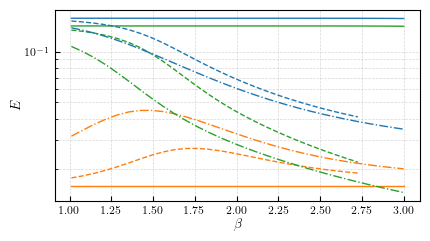

In [45]:
IMG_DIRECTORY = "./Assets/powerlawBeta"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.25 * 458.63788

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

tuple_size = (4.25,2.7)

multiplier = 1.2
second_multiplier = 0.7

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=(tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.11)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.83)
fig.subplots_adjust(right=0.97)




# Create a custom legend
custom_legend = []

linestyles = ["solid", "dashed", "dashdot", "dotted"]


data_dic = {}

for idx_epsilon, epsilon in enumerate(epsilons):

    df_filtered = df.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="beta")        

    betas = list(df_filtered["beta"].unique())

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error


    adversarial_lines = axes.plot(betas, adversarial_error, linestyle=linestyles[idx_epsilon],color="C0")
    axes.plot(betas, generalization_error, linestyle=linestyles[idx_epsilon],color="C1")
    axes.plot(betas, boundary_error,linestyle=linestyles[idx_epsilon], color="C2")



# axes.set_xscale("log")
axes.set_yscale("log")



axes.set_ylabel(r"$E$", labelpad=2.0)


axes.set_xlabel(r"$\beta$", labelpad=2.0)
axes.grid(which="both", axis="both", alpha=0.5)
# Set the major ticks to face inwards
axes.tick_params(axis='both', which='major', direction='in')

# Set the minor ticks to face inwards
axes.tick_params(axis='both', which='minor', direction='in')

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))

epsilon_legend = []
epsilon_legend.append(Line2D([0],[0],color="black", linestyle="solid", label=r"$\varepsilon_t=0.0$"))
epsilon_legend.append(Line2D([0],[0],color="black", linestyle="dashed", label=r"$\varepsilon_t=0.1$"))
epsilon_legend.append(Line2D([0],[0],color="black", linestyle="dashdot", label=r"$\varepsilon_t=0.2$"))

# for idx, epsilon in enumerate(epsilons):
#     epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = error_legend + epsilon_legend

# for idx in range(len(error_legend)):
#     custom_legend.append(error_legend[idx])
#     custom_legend.append(epsilon_legend[idx])

# custom_legend.append(error_legend[-1])


# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=3)

save = True
if save:
    save_plot(
        fig,
        f"powerlawbeta",
    )

plt.show()